# Задание 1

## Импорты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

In [ ]:
def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * tf.math.exp(-0.1)

LRScallback = tf.keras.callbacks.LearningRateScheduler(scheduler)

## Загрузка данных

In [ ]:
# Загрузка данных
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/OmSTU/CV/

Train_Dir = 'training.csv'
Test_Dir = 'test.csv'
lookid_dir = 'IdLookupTable.csv'

train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/OmSTU/CV


## Предобработка данных

In [ ]:
# Предобработка данных
train_data['Image'] = train_data['Image'].apply(lambda img: np.fromstring(img, sep=' ') / 255.0)
train_data = train_data.dropna()

## Разделение выборки

In [ ]:
# Создание признаков и меток
X = np.vstack(train_data['Image']).reshape(-1, 96, 96, 1)
y = train_data[train_data.columns[:-1]].values

# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Создание модели c Dropout и Batch Normalization

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(30))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        320       
                                                                 
 dropout (Dropout)           (None, 94, 94, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 94, 94, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        8256      
                                                                 
 dropout_1 (Dropout)         (None, 46, 46, 64)        0

In [ ]:
# model_aug with augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

model_aug = Sequential()

model_aug.add(data_augmentation,)

model_aug.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model_aug.add(Dropout(0.1))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Conv2D(64, (2, 2), activation='relu'))
model_aug.add(Dropout(0.1))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Conv2D(128, (2, 2), activation='relu'))
model_aug.add(Dropout(0.1))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Conv2D(256, (2, 2), activation='relu'))
model_aug.add(Dropout(0.1))
model_aug.add(BatchNormalization())
model_aug.add(MaxPooling2D(pool_size=(2, 2)))

model_aug.add(Flatten())
model_aug.add(Dense(256, activation='relu'))
model_aug.add(Dropout(0.1))
model_aug.add(BatchNormalization())

model_aug.add(Dense(30))

## Создание таблици для сохранения результатов

In [ ]:
results = pd.DataFrame(columns=['Optimizer', 'Learning Rate Scheduler', 'Augmentation', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])

## RMSProp

### Learning Rate Scheduler - false

Augmentation - false

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer='RMSprop', 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 62s 8s/step - loss: 2614.6692 - acc: 0.0829 - val_loss: 2608.2688 - val_acc: 0.0000e+00
Epoch 2/5
7/7 [==============================] - 64s 9s/step - loss: 2600.6265 - acc: 0.1449 - val_loss: 2586.0024 - val_acc: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 61s 9s/step - loss: 2587.2815 - acc: 0.1513 - val_loss: 2590.0505 - val_acc: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 60s 8s/step - loss: 2568.5222 - acc: 0.1717 - val_loss: 2629.3477 - val_acc: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 61s 9s/step - loss: 2547.8333 - acc: 0.1764 - val_loss: 2514.1611 - val_acc: 0.0000e+00


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)

14/14 [==============================] - 2s 128ms/step - loss: 2514.1611 - acc: 0.0000e+00


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "RMSprop",
                          'Learning Rate Scheduler': None,
                          'Augmentation': None,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-64-81a6e5b103c2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "RMSprop",


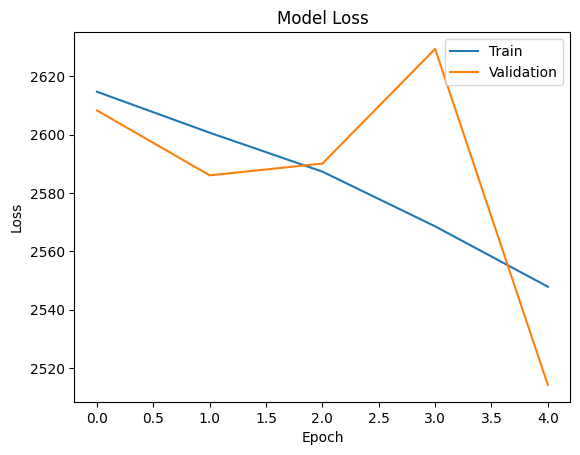

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  Train Accuracy  \
0   RMSprop                    None         None  2547.833252        0.176402   

     Test Loss  Test Accuracy  
0  2514.161133            0.0

### Learning Rate Scheduler - false

Augmentation - true

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_aug.compile(optimizer='RMSprop', 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model_aug.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 63s 8s/step - loss: 2617.2068 - acc: 0.0561 - val_loss: 2607.3052 - val_acc: 0.0023
Epoch 2/5
7/7 [==============================] - 67s 9s/step - loss: 2604.9995 - acc: 0.0952 - val_loss: 2611.8254 - val_acc: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 60s 9s/step - loss: 2590.0222 - acc: 0.1203 - val_loss: 2590.0017 - val_acc: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 54s 8s/step - loss: 2572.2798 - acc: 0.1308 - val_loss: 2556.0208 - val_acc: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 53s 8s/step - loss: 2551.2949 - acc: 0.1209 - val_loss: 2551.6707 - val_acc: 0.0000e+00


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model_aug.evaluate(X_val, y_val)

14/14 [==============================] - 2s 122ms/step - loss: 2551.6707 - acc: 0.0000e+00


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "RMSprop",
                          'Learning Rate Scheduler': None,
                          'Augmentation': True,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-72-09d12c553807>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "RMSprop",


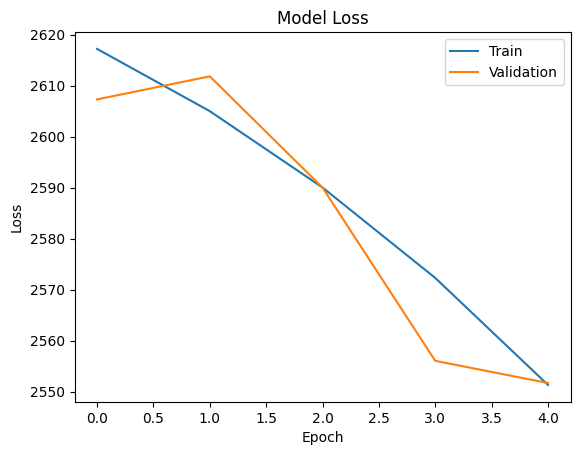

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  Train Accuracy  \
0   RMSprop                    None         None  2547.833252        0.176402   
1   RMSprop                    None         True  2551.294922        0.120911   

     Test Loss  Test Accuracy  
0  2514.161133            0.0  
1  2551.670654            0.0

### Learning Rate Scheduler - true

Augmentation - false

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer='RMSprop', 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val),callbacks=[LRScallback])

Epoch 1/5
7/7 [==============================] - 56s 8s/step - loss: 2521.0442 - acc: 0.1437 - val_loss: 2374.9780 - val_acc: 0.0023 - lr: 0.0010
Epoch 2/5
7/7 [==============================] - 53s 8s/step - loss: 2478.7837 - acc: 0.1741 - val_loss: 2374.4329 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 3/5
7/7 [==============================] - 52s 8s/step - loss: 2445.3337 - acc: 0.1805 - val_loss: 2362.8545 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 4/5
7/7 [==============================] - 54s 8s/step - loss: 2411.7078 - acc: 0.1711 - val_loss: 2289.5791 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 5/5
7/7 [==============================] - 55s 8s/step - loss: 2376.9421 - acc: 0.1764 - val_loss: 2324.7417 - val_acc: 0.0000e+00 - lr: 0.0010


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)

14/14 [==============================] - 2s 130ms/step - loss: 2324.7417 - acc: 0.0000e+00


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "RMSprop",
                          'Learning Rate Scheduler': True,
                          'Augmentation': None,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-80-33855d8063bf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "RMSprop",


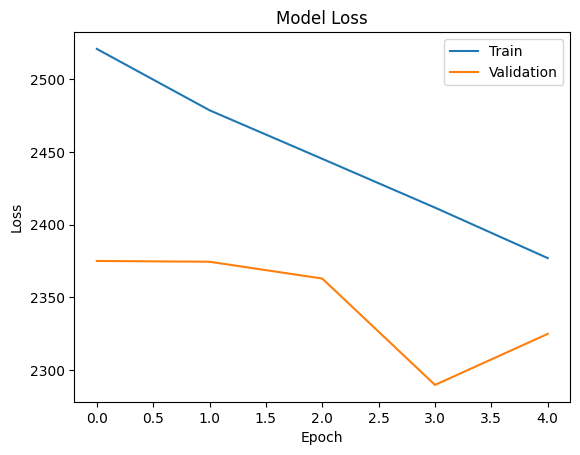

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  Train Accuracy  \
0   RMSprop                    None         None  2547.833252        0.176402   
1   RMSprop                    None         True  2551.294922        0.120911   
2   RMSprop                    True         None  2376.942139        0.176402   

     Test Loss  Test Accuracy  
0  2514.161133            0.0  
1  2551.670654            0.0  
2  2324.741699            0.0

### Learning Rate Scheduler - true

Augmentation - true

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_aug.compile(optimizer='RMSprop', 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model_aug.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 58s 8s/step - loss: 2522.1182 - acc: 0.1273 - val_loss: 2566.7803 - val_acc: 0.0000e+00
Epoch 2/5
7/7 [==============================] - 54s 8s/step - loss: 2481.4717 - acc: 0.1414 - val_loss: 2293.9131 - val_acc: 0.0491
Epoch 3/5
7/7 [==============================] - 54s 8s/step - loss: 2448.5745 - acc: 0.1408 - val_loss: 2314.0557 - val_acc: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 53s 8s/step - loss: 2414.4692 - acc: 0.1454 - val_loss: 2148.8564 - val_acc: 0.2547
Epoch 5/5
7/7 [==============================] - 54s 8s/step - loss: 2379.6646 - acc: 0.1262 - val_loss: 2155.7815 - val_acc: 0.2547


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model_aug.evaluate(X_val, y_val)

14/14 [==============================] - 2s 131ms/step - loss: 2155.7815 - acc: 0.2547


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "RMSprop",
                          'Learning Rate Scheduler': True,
                          'Augmentation': True,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-88-b4adda95a0f3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "RMSprop",


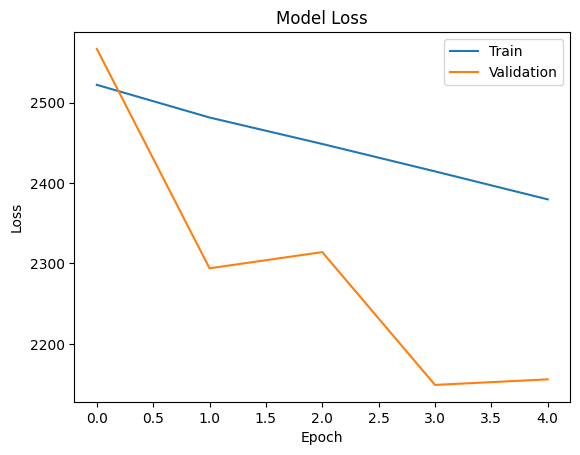

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  Train Accuracy  \
0   RMSprop                    None         None  2547.833252        0.176402   
1   RMSprop                    None         True  2551.294922        0.120911   
2   RMSprop                    True         None  2376.942139        0.176402   
3   RMSprop                    True         True  2379.664551        0.126168   

     Test Loss  Test Accuracy  
0  2514.161133       0.000000  
1  2551.670654       0.000000  
2  2324.741699       0.000000  
3  2155.781494       0.254673

## Adam

In [ ]:
# Создание модели CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(30))

### Learning Rate Scheduler - false

Augmentation - false

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 29s 4s/step - loss: 2313.1257 - acc: 0.7027 - val_loss: 947.0212 - val_acc: 0.7150
Epoch 2/5
7/7 [==============================] - 28s 4s/step - loss: 487.5126 - acc: 0.7027 - val_loss: 223.4116 - val_acc: 0.7150
Epoch 3/5
7/7 [==============================] - 28s 4s/step - loss: 261.9567 - acc: 0.3189 - val_loss: 199.1754 - val_acc: 0.2547
Epoch 4/5
7/7 [==============================] - 28s 4s/step - loss: 173.9160 - acc: 0.1957 - val_loss: 138.6630 - val_acc: 0.0047
Epoch 5/5
7/7 [==============================] - 28s 4s/step - loss: 120.4078 - acc: 0.4982 - val_loss: 108.6699 - val_acc: 0.7150


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)

14/14 [==============================] - 1s 104ms/step - loss: 108.6699 - acc: 0.7150


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "Adam",
                          'Learning Rate Scheduler': None,
                          'Augmentation': None,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-97-386e60ca21af>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "Adam",


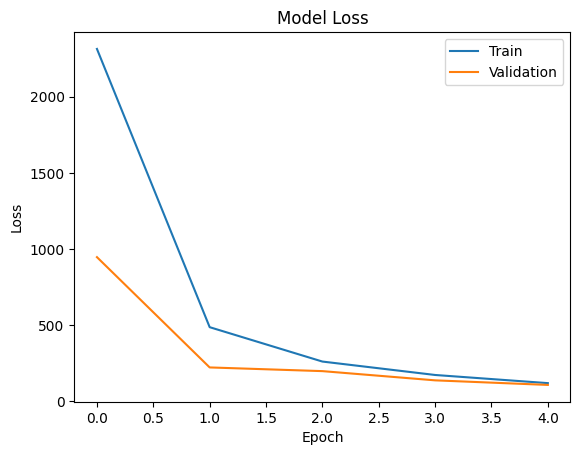

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  Train Accuracy  \
0   RMSprop                    None         None  2547.833252        0.176402   
1   RMSprop                    None         True  2551.294922        0.120911   
2   RMSprop                    True         None  2376.942139        0.176402   
3   RMSprop                    True         True  2379.664551        0.126168   
4      Adam                    None         None   120.407768        0.498248   

     Test Loss  Test Accuracy  
0  2514.161133       0.000000  
1  2551.670654       0.000000  
2  2324.741699       0.000000  
3  2155.781494       0.254673  
4   108.669907       0.714953

### Learning Rate Scheduler - false

Augmentation - true

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_aug.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model_aug.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 59s 8s/step - loss: 2343.7034 - acc: 0.1530 - val_loss: 2058.6462 - val_acc: 0.0047
Epoch 2/5
7/7 [==============================] - 57s 8s/step - loss: 2307.5830 - acc: 0.1314 - val_loss: 2102.9321 - val_acc: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 56s 8s/step - loss: 2269.4983 - acc: 0.1355 - val_loss: 2076.9583 - val_acc: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 53s 8s/step - loss: 2228.9507 - acc: 0.1367 - val_loss: 1984.7812 - val_acc: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 54s 8s/step - loss: 2186.1357 - acc: 0.1437 - val_loss: 1891.2137 - val_acc: 0.0000e+00


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model_aug.evaluate(X_val, y_val)

14/14 [==============================] - 2s 134ms/step - loss: 1891.2137 - acc: 0.0000e+00


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "Adam",
                          'Learning Rate Scheduler': None,
                          'Augmentation': True,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-105-b1d2cd984e4d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "Adam",


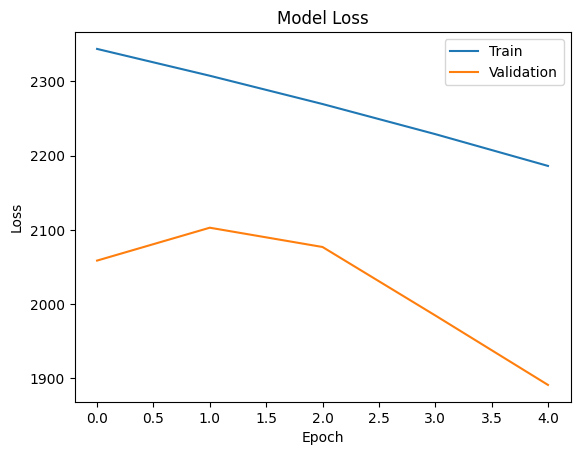

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  Train Accuracy  \
0   RMSprop                    None         None  2547.833252        0.176402   
1   RMSprop                    None         True  2551.294922        0.120911   
2   RMSprop                    True         None  2376.942139        0.176402   
3   RMSprop                    True         True  2379.664551        0.126168   
4      Adam                    None         None   120.407768        0.498248   
5      Adam                    None         True  2186.135742        0.143692   

     Test Loss  Test Accuracy  
0  2514.161133       0.000000  
1  2551.670654       0.000000  
2  2324.741699       0.000000  
3  2155.781494       0.254673  
4   108.669907       0.714953  
5  1891.213745       0.000000

### Learning Rate Scheduler - true

Augmentation - false

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 29s 4s/step - loss: 156.3477 - acc: 0.6916 - val_loss: 138.7399 - val_acc: 0.6519
Epoch 2/5
7/7 [==============================] - 28s 4s/step - loss: 99.3600 - acc: 0.6980 - val_loss: 63.0858 - val_acc: 0.7150
Epoch 3/5
7/7 [==============================] - 28s 4s/step - loss: 69.8384 - acc: 0.7027 - val_loss: 49.7740 - val_acc: 0.7150
Epoch 4/5
7/7 [==============================] - 28s 4s/step - loss: 45.0022 - acc: 0.7027 - val_loss: 38.5892 - val_acc: 0.7150
Epoch 5/5
7/7 [==============================] - 29s 4s/step - loss: 33.1895 - acc: 0.7027 - val_loss: 28.3349 - val_acc: 0.7150


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)

14/14 [==============================] - 1s 99ms/step - loss: 28.3349 - acc: 0.7150


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "Adam",
                          'Learning Rate Scheduler': True,
                          'Augmentation': None,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-113-939f459c7cbe>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "Adam",


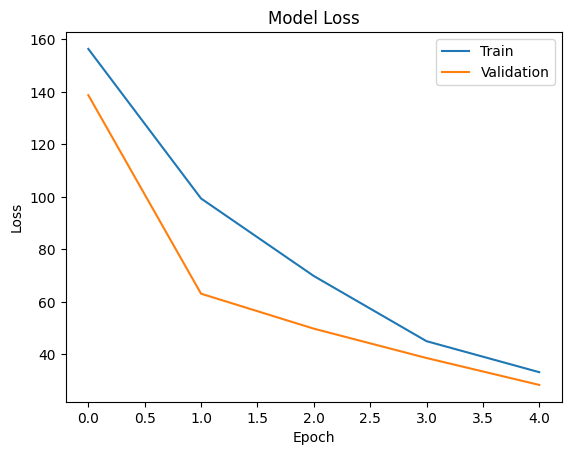

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  Train Accuracy  \
0   RMSprop                    None         None  2547.833252        0.176402   
1   RMSprop                    None         True  2551.294922        0.120911   
2   RMSprop                    True         None  2376.942139        0.176402   
3   RMSprop                    True         True  2379.664551        0.126168   
4      Adam                    None         None   120.407768        0.498248   
5      Adam                    None         True  2186.135742        0.143692   
6      Adam                    True         None    33.189545        0.702687   

     Test Loss  Test Accuracy  
0  2514.161133       0.000000  
1  2551.670654       0.000000  
2  2324.741699       0.000000  
3  2155.781494       0.254673  
4   108.669907       0.714953  
5  1891.213745       0.000000  
6    28.334927       0.714953

### Learning Rate Scheduler - true

Augmentation - true

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_aug.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model_aug.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 57s 8s/step - loss: 2142.4451 - acc: 0.1367 - val_loss: 1918.8566 - val_acc: 0.0000e+00
Epoch 2/5
7/7 [==============================] - 58s 8s/step - loss: 2097.4080 - acc: 0.1647 - val_loss: 1850.4430 - val_acc: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 59s 8s/step - loss: 2050.9355 - acc: 0.1717 - val_loss: 1814.1959 - val_acc: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 56s 8s/step - loss: 2002.5475 - acc: 0.1758 - val_loss: 1733.8777 - val_acc: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 55s 8s/step - loss: 1952.2539 - acc: 0.1595 - val_loss: 1519.6195 - val_acc: 0.0000e+00


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model_aug.evaluate(X_val, y_val)

14/14 [==============================] - 2s 131ms/step - loss: 1519.6196 - acc: 0.0000e+00


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "Adam",
                          'Learning Rate Scheduler': True,
                          'Augmentation': True,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-121-c682e938361e>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "Adam",


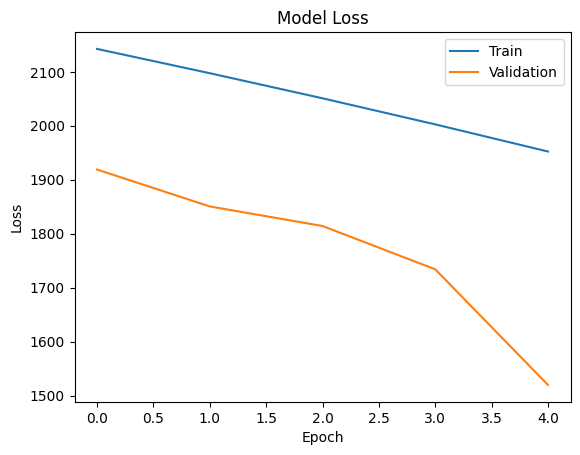

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  Train Accuracy  \
0   RMSprop                    None         None  2547.833252        0.176402   
1   RMSprop                    None         True  2551.294922        0.120911   
2   RMSprop                    True         None  2376.942139        0.176402   
3   RMSprop                    True         True  2379.664551        0.126168   
4      Adam                    None         None   120.407768        0.498248   
5      Adam                    None         True  2186.135742        0.143692   
6      Adam                    True         None    33.189545        0.702687   
7      Adam                    True         True  1952.253906        0.159463   

     Test Loss  Test Accuracy  
0  2514.161133       0.000000  
1  2551.670654       0.000000  
2  2324.741699       0.000000  
3  2155.781494       0.254673  
4   108.669907       0.714953  
5  1891.213745       0.000000  
6    28.334927       0.714953  
7  1519.619629       0.000000

## SGD Momentum

### Learning Rate Scheduler - false

Augmentation - false

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer=SGD(momentum=0.8), 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 54s 8s/step - loss: 2521.9443 - acc: 0.1180 - val_loss: 1956.0239 - val_acc: 0.7150
Epoch 2/5
7/7 [==============================] - 53s 7s/step - loss: 870.6083 - acc: 0.6069 - val_loss: 3934500.0000 - val_acc: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 55s 8s/step - loss: 97.0740 - acc: 0.6326 - val_loss: 765920.1250 - val_acc: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 54s 8s/step - loss: 34.5931 - acc: 0.7027 - val_loss: 24305.3496 - val_acc: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 51s 7s/step - loss: 14.7821 - acc: 0.7015 - val_loss: 3408.6741 - val_acc: 0.0000e+00


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)

14/14 [==============================] - 2s 144ms/step - loss: 3408.6738 - acc: 0.0000e+00


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "SGD(momentum=0.8)",
                          'Learning Rate Scheduler': None,
                          'Augmentation': None,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-134-2e75a18397dc>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "SGD(momentum=0.8)",


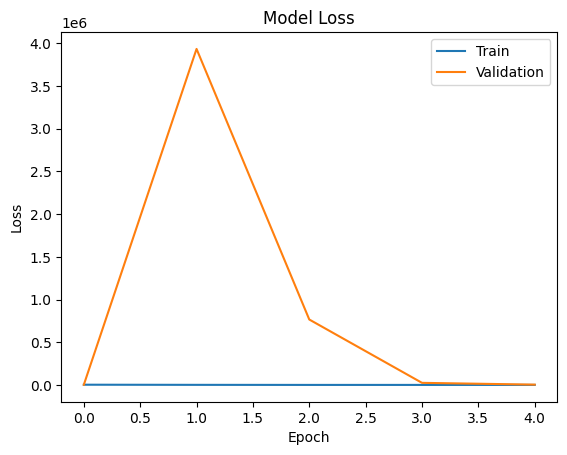

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  \
0            RMSprop                    None         None  2547.833252   
1            RMSprop                    None         True  2551.294922   
2            RMSprop                    True         None  2376.942139   
3            RMSprop                    True         True  2379.664551   
4               Adam                    None         None   120.407768   
5               Adam                    None         True  2186.135742   
6               Adam                    True         None    33.189545   
7               Adam                    True         True  1952.253906   
8  SGD(momentum=0.8)                    None         None    14.782054   

   Train Accuracy    Test Loss  Test Accuracy  
0        0.176402  2514.161133       0.000000  
1        0.120911  2551.670654       0.000000  
2        0.176402  2324.741699       0.000000  
3        0.126168  2155.781494       0.254673  
4        0.498248   108.669907       0.714953  
5        0.143692  1891.213745       0.000000  
6        0.702687    28.334927       0.714953  
7        0.159463  1519.619629       0.000000  
8        0.701519  3408.673828       0.000000

### Learning Rate Scheduler - false

Augmentation - true

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_aug.compile(optimizer=SGD(momentum=0.8), 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model_aug.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 55s 8s/step - loss: 777.0935 - acc: 0.4451 - val_loss: 260.5540 - val_acc: 0.7150
Epoch 2/5
7/7 [==============================] - 55s 8s/step - loss: 110.6265 - acc: 0.7068 - val_loss: 133.3482 - val_acc: 0.7150
Epoch 3/5
7/7 [==============================] - 55s 8s/step - loss: 35.3006 - acc: 0.7039 - val_loss: 14.5193 - val_acc: 0.7150
Epoch 4/5
7/7 [==============================] - 55s 8s/step - loss: 14.1423 - acc: 0.7027 - val_loss: 22.2891 - val_acc: 0.7150
Epoch 5/5
7/7 [==============================] - 52s 8s/step - loss: 9.7704 - acc: 0.7114 - val_loss: 27.1882 - val_acc: 0.7150


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model_aug.evaluate(X_val, y_val)

14/14 [==============================] - 2s 115ms/step - loss: 27.1882 - acc: 0.7150


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "SGD(momentum=0.8)",
                          'Learning Rate Scheduler': None,
                          'Augmentation': True,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-142-e721adf5f7b5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "SGD(momentum=0.8)",


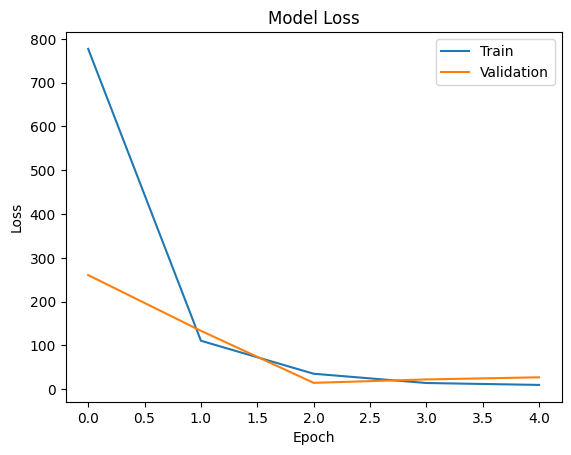

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  \
0            RMSprop                    None         None  2547.833252   
1            RMSprop                    None         True  2551.294922   
2            RMSprop                    True         None  2376.942139   
3            RMSprop                    True         True  2379.664551   
4               Adam                    None         None   120.407768   
5               Adam                    None         True  2186.135742   
6               Adam                    True         None    33.189545   
7               Adam                    True         True  1952.253906   
8  SGD(momentum=0.8)                    None         None    14.782054   
9  SGD(momentum=0.8)                    None         True     9.770391   

   Train Accuracy    Test Loss  Test Accuracy  
0        0.176402  2514.161133       0.000000  
1        0.120911  2551.670654       0.000000  
2        0.176402  2324.741699       0.000000  
3        0.126168  2155.781494       0.254673  
4        0.498248   108.669907       0.714953  
5        0.143692  1891.213745       0.000000  
6        0.702687    28.334927       0.714953  
7        0.159463  1519.619629       0.000000  
8        0.701519  3408.673828       0.000000  
9        0.711449    27.188223       0.714953

### Learning Rate Scheduler - true

Augmentation - false

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer=SGD(momentum=0.8), 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 55s 8s/step - loss: 9.9062 - acc: 0.7021 - val_loss: 790.1094 - val_acc: 0.2430
Epoch 2/5
7/7 [==============================] - 50s 7s/step - loss: 9.7266 - acc: 0.7027 - val_loss: 293.1401 - val_acc: 0.6822
Epoch 3/5
7/7 [==============================] - 53s 7s/step - loss: 9.4416 - acc: 0.7027 - val_loss: 124.4752 - val_acc: 0.7103
Epoch 4/5
7/7 [==============================] - 54s 8s/step - loss: 9.2381 - acc: 0.7021 - val_loss: 62.9561 - val_acc: 0.7150
Epoch 5/5
7/7 [==============================] - 51s 7s/step - loss: 9.0233 - acc: 0.7021 - val_loss: 35.2568 - val_acc: 0.7150


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)

14/14 [==============================] - 2s 115ms/step - loss: 35.2568 - acc: 0.7150


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "SGD(momentum=0.8)",
                          'Learning Rate Scheduler': True,
                          'Augmentation': None,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-150-885349534b0c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "SGD(momentum=0.8)",


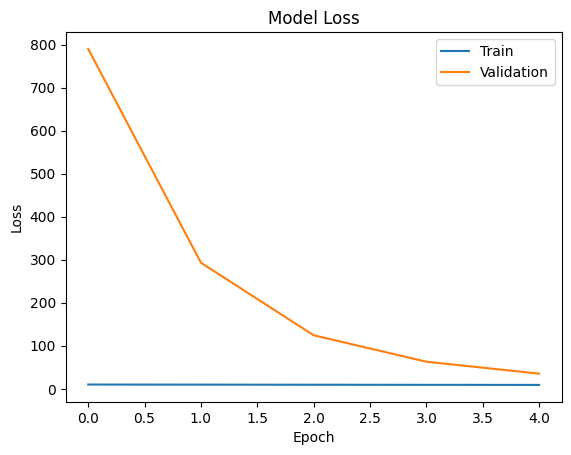

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  \
0             RMSprop                    None         None  2547.833252   
1             RMSprop                    None         True  2551.294922   
2             RMSprop                    True         None  2376.942139   
3             RMSprop                    True         True  2379.664551   
4                Adam                    None         None   120.407768   
5                Adam                    None         True  2186.135742   
6                Adam                    True         None    33.189545   
7                Adam                    True         True  1952.253906   
8   SGD(momentum=0.8)                    None         None    14.782054   
9   SGD(momentum=0.8)                    None         True     9.770391   
10  SGD(momentum=0.8)                    True         None     9.023308   

    Train Accuracy    Test Loss  Test Accuracy  
0         0.176402  2514.161133       0.000000  
1         0.120911  2551.670654       0.000000  
2         0.176402  2324.741699       0.000000  
3         0.126168  2155.781494       0.254673  
4         0.498248   108.669907       0.714953  
5         0.143692  1891.213745       0.000000  
6         0.702687    28.334927       0.714953  
7         0.159463  1519.619629       0.000000  
8         0.701519  3408.673828       0.000000  
9         0.711449    27.188223       0.714953  
10        0.702103    35.256798       0.714953

### Learning Rate Scheduler - true

Augmentation - true

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_aug.compile(optimizer=SGD(momentum=0.8), 
              loss='mean_squared_error',
              metrics=['acc'])

In [ ]:
history = model_aug.fit(X_train,y_train,epochs = 5,batch_size = 256,validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 56s 8s/step - loss: 8.7245 - acc: 0.7039 - val_loss: 21.7969 - val_acc: 0.7150
Epoch 2/5
7/7 [==============================] - 53s 7s/step - loss: 8.3702 - acc: 0.7039 - val_loss: 26.6078 - val_acc: 0.7126
Epoch 3/5
7/7 [==============================] - 54s 8s/step - loss: 8.3663 - acc: 0.7103 - val_loss: 31.8782 - val_acc: 0.7150
Epoch 4/5
7/7 [==============================] - 52s 8s/step - loss: 8.2273 - acc: 0.7126 - val_loss: 100.5716 - val_acc: 0.6565
Epoch 5/5
7/7 [==============================] - 54s 8s/step - loss: 8.1352 - acc: 0.7044 - val_loss: 88.8853 - val_acc: 0.6449


In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model_aug.evaluate(X_val, y_val)

14/14 [==============================] - 3s 209ms/step - loss: 88.8853 - acc: 0.6449


In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "SGD(momentum=0.8)",
                          'Learning Rate Scheduler': True,
                          'Augmentation': True,
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-158-c12d0af2abdf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "SGD(momentum=0.8)",


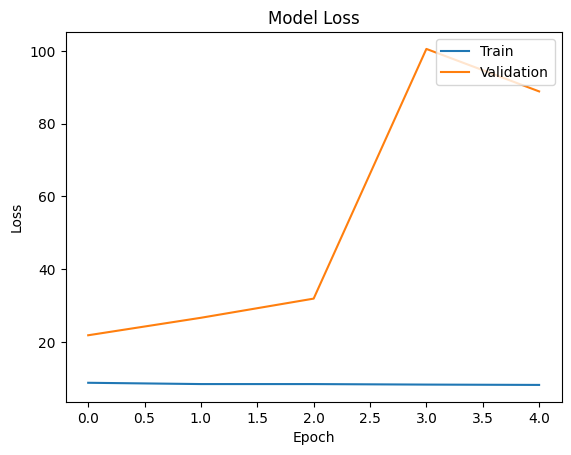

In [ ]:
# Построение графика обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  \
0             RMSprop                    None         None  2547.833252   
1             RMSprop                    None         True  2551.294922   
2             RMSprop                    True         None  2376.942139   
3             RMSprop                    True         True  2379.664551   
4                Adam                    None         None   120.407768   
5                Adam                    None         True  2186.135742   
6                Adam                    True         None    33.189545   
7                Adam                    True         True  1952.253906   
8   SGD(momentum=0.8)                    None         None    14.782054   
9   SGD(momentum=0.8)                    None         True     9.770391   
10  SGD(momentum=0.8)                    True         None     9.023308   
11  SGD(momentum=0.8)                    True         True     8.135220   

    Train Accuracy    Test Loss  Test Accuracy  
0         0.176402  2514.161133       0.000000  
1         0.120911  2551.670654       0.000000  
2         0.176402  2324.741699       0.000000  
3         0.126168  2155.781494       0.254673  
4         0.498248   108.669907       0.714953  
5         0.143692  1891.213745       0.000000  
6         0.702687    28.334927       0.714953  
7         0.159463  1519.619629       0.000000  
8         0.701519  3408.673828       0.000000  
9         0.711449    27.188223       0.714953  
10        0.702103    35.256798       0.714953  
11        0.704439    88.885330       0.644860

## Отобразить активации внутренних слоев сети

In [ ]:
!pip install vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Визуализация фильторв слоев

<Figure size 1500x1000 with 0 Axes>

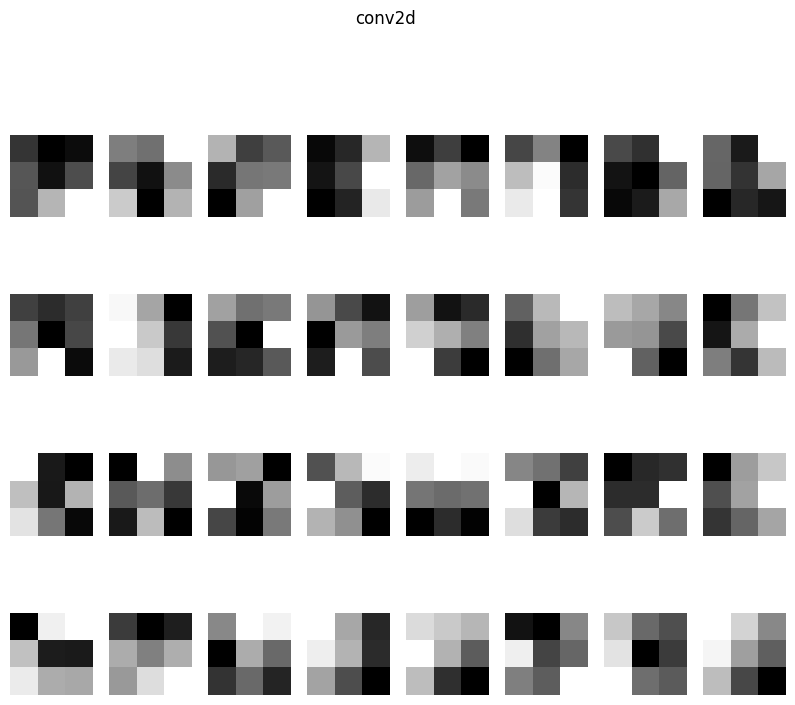

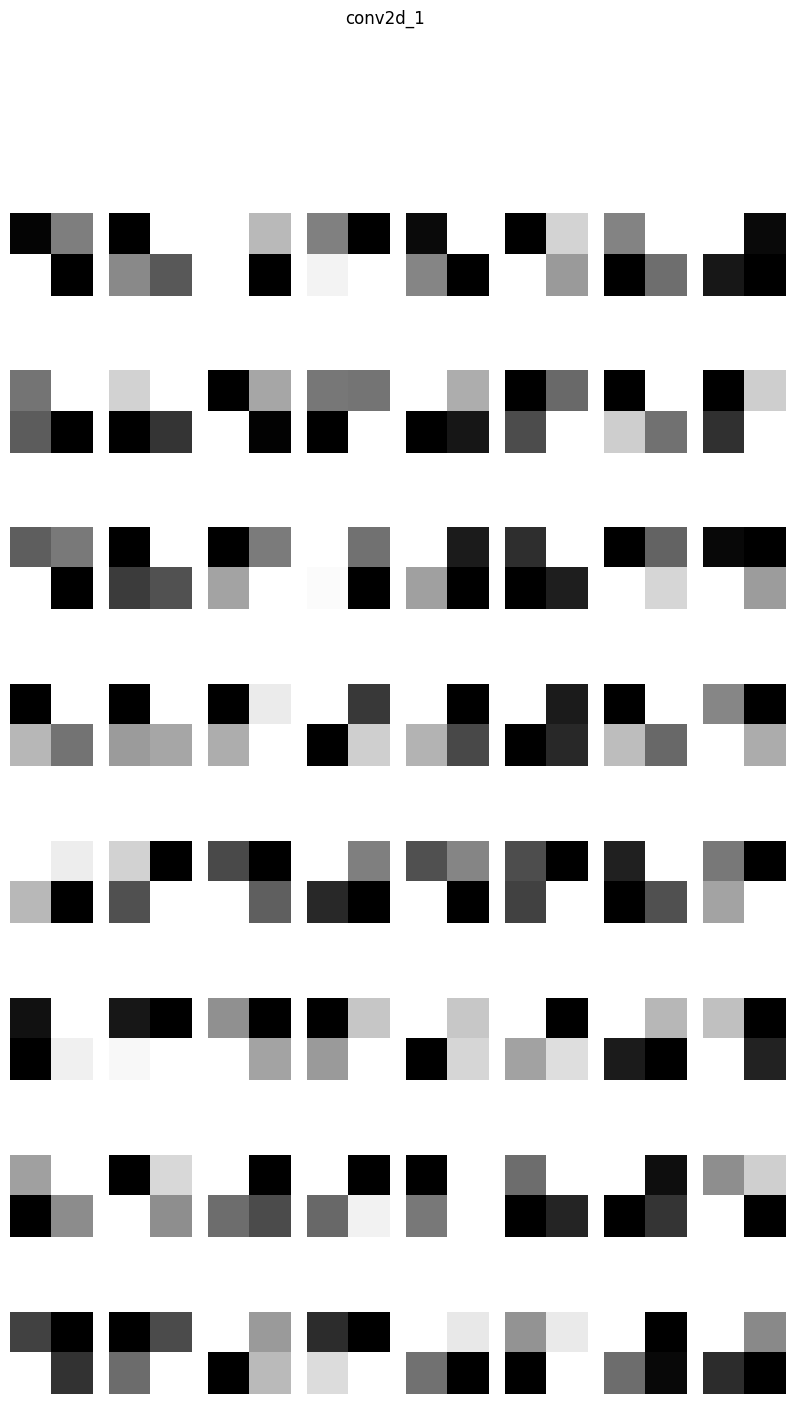

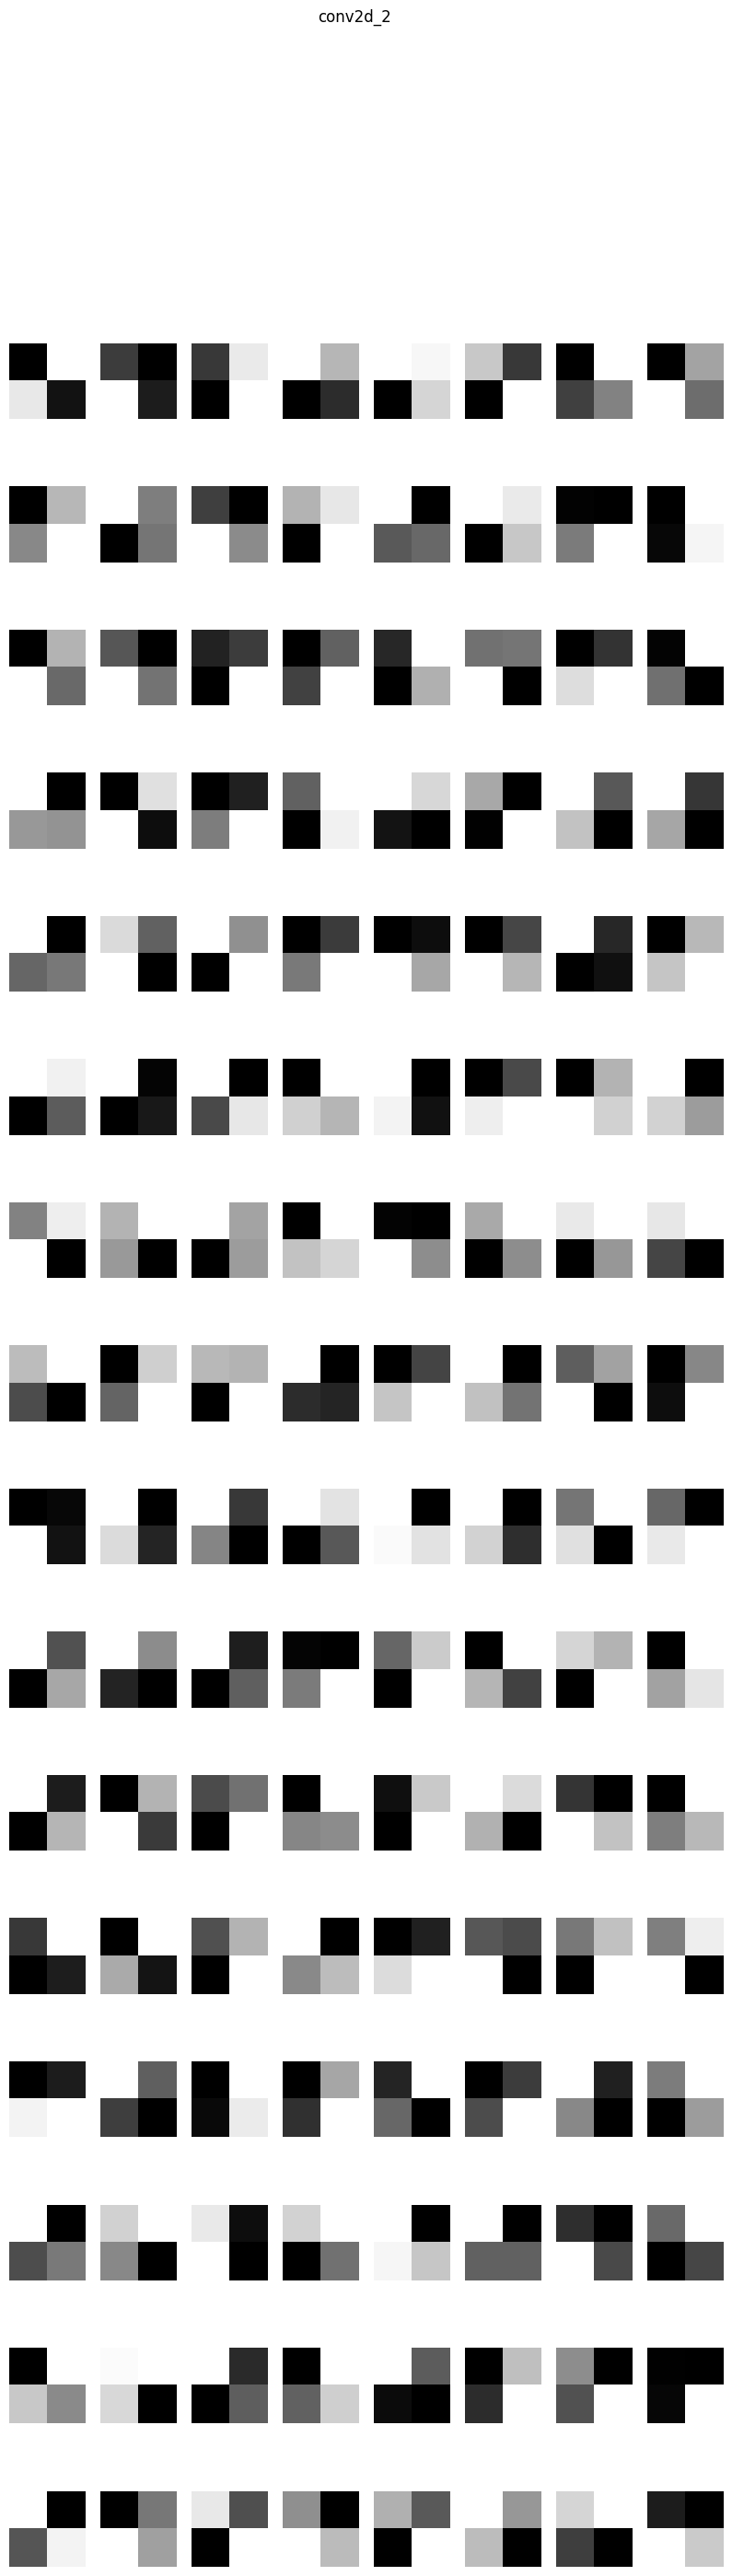

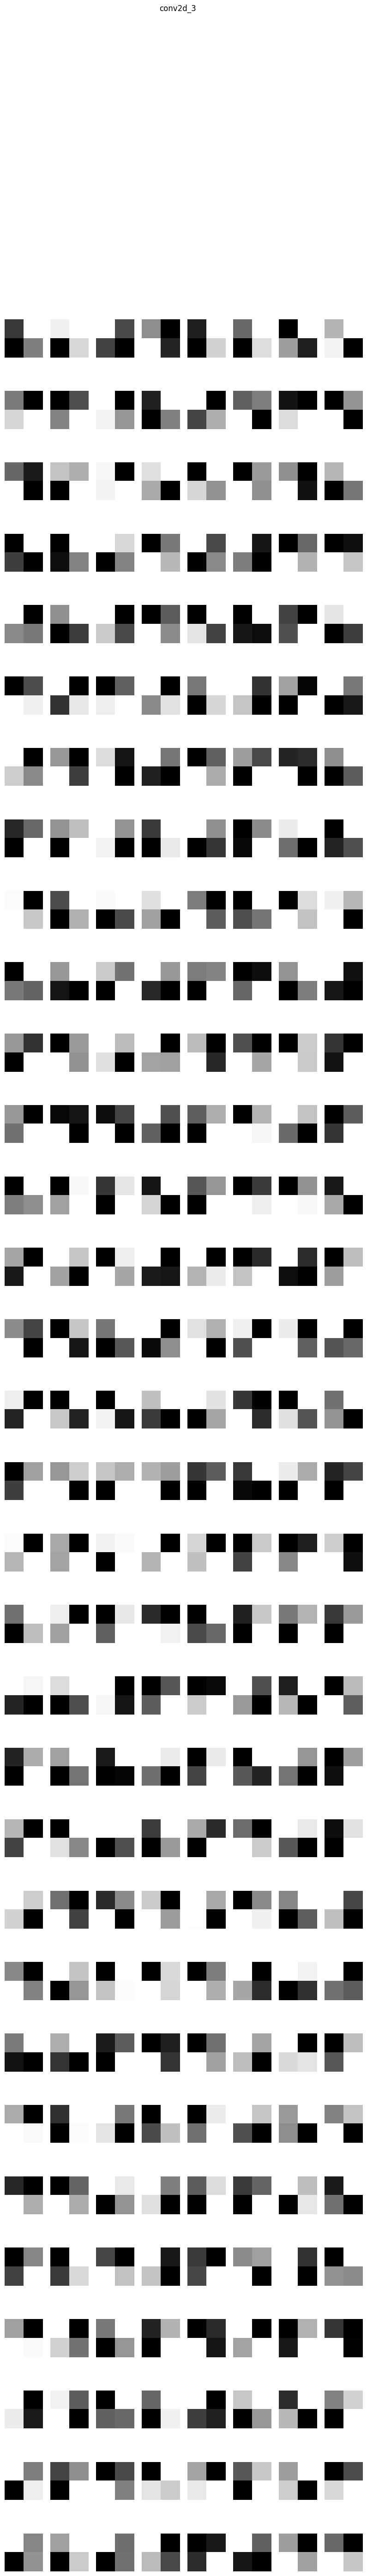

In [ ]:
# Визуализация фильтров внутренних слоев
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3']
layers = [model.get_layer(name) for name in layer_names]

plt.figure(figsize=(15, 10))

for layer in layers:
    filters = layer.get_weights()[0]

    n_filters = filters.shape[3]
    n_cols = 8
    n_rows = n_filters // n_cols + 1

    plt.figure(figsize=(10, 2 * n_rows))
    for i in range(n_filters):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(filters[:, :, 0, i], cmap='gray')
        plt.axis('off')
    plt.suptitle(layer.name)
    plt.show()

### Визуализация активаций внутренних слоев

14/14 [==============================] - 6s 396ms/step


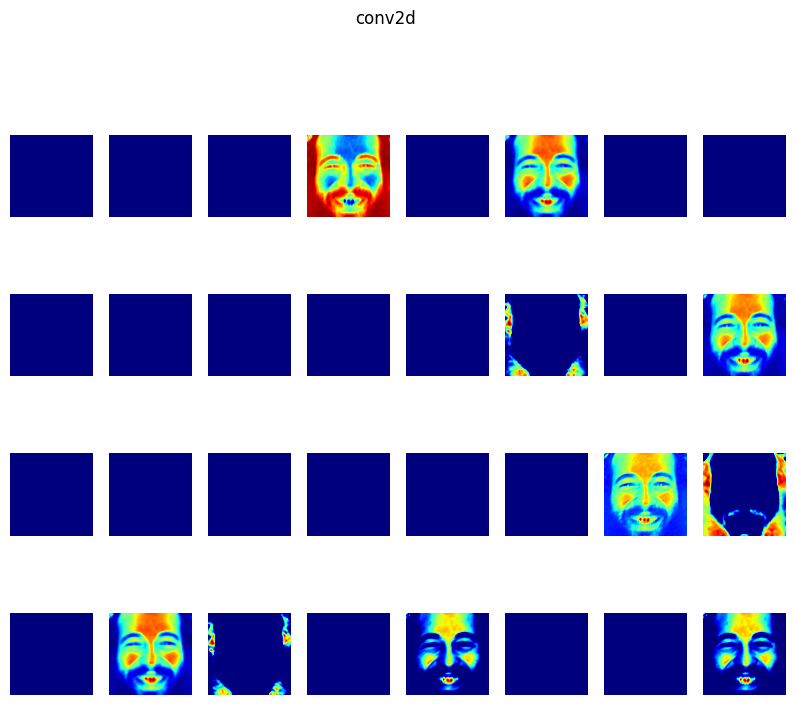

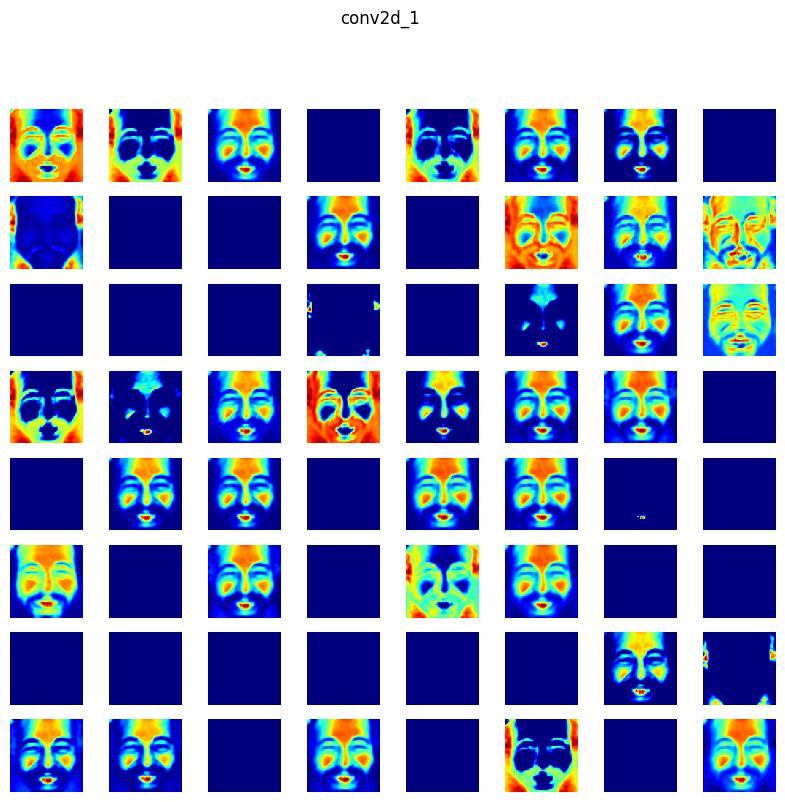

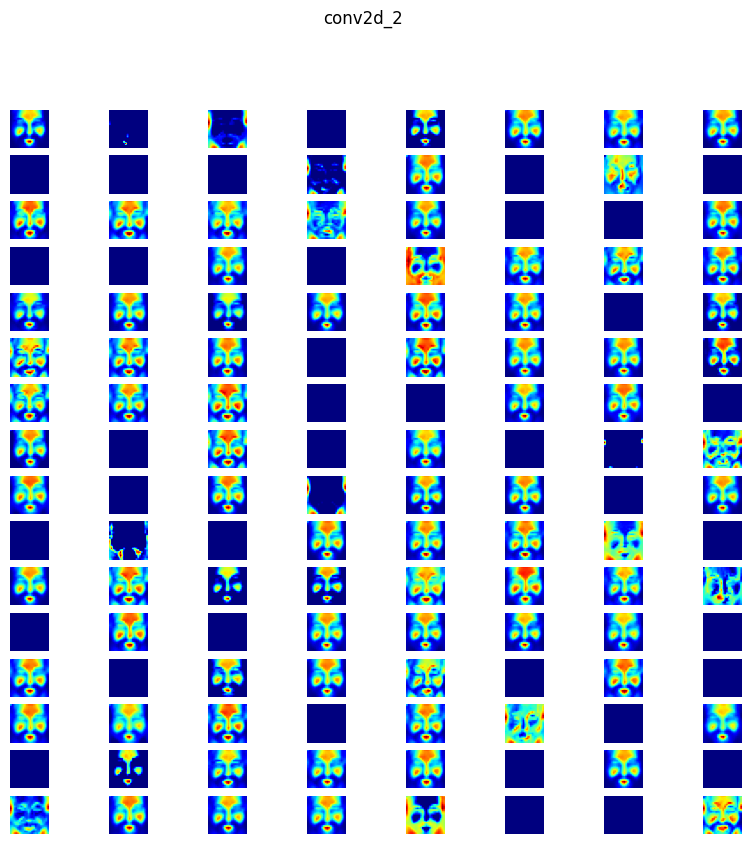

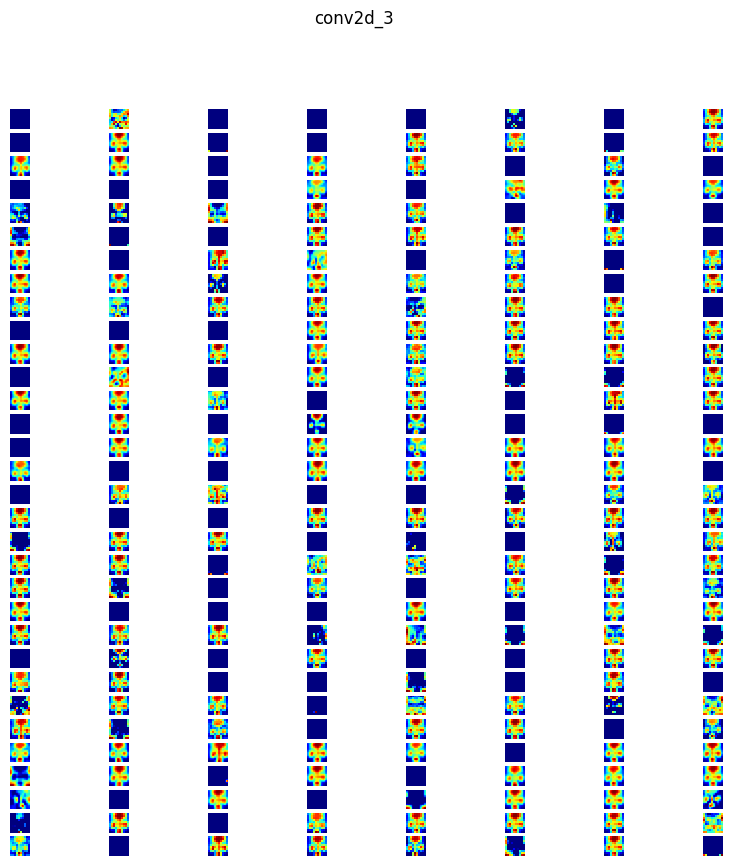

In [ ]:
from keras.models import Model
# Получение активаций внутренних слоев
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3']
outputs = [model.get_layer(layer_name).output for layer_name in layer_names]
activation_model = Model(inputs=model.input, outputs=outputs)
activations = activation_model.predict(X_val)

# Визуализация активаций внутренних слоев
for layer_activation, layer_name in zip(activations, layer_names):
    plt.figure(figsize=(10, 10))
    n_filters = layer_activation.shape[3]
    n_cols = 8
    n_rows = n_filters // n_cols + 1
    for i in range(n_filters):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(layer_activation[0, :, :, i], cmap='jet')
        plt.axis('off')
    plt.suptitle(layer_name)
    plt.show()

## Transfer Learning

In [ ]:
# import keras
import tensorflow as tf
# from tensorflow.keras.applications import VGG16

# Изменение размера входных изображений
input_shape = (96, 96, 3)  # Новый размер изображений

# Загрузка предобученной модели VGG16 с весами ImageNet
vgg = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in vgg.layers:
  layer.trainable = False

# Создание нового классификационного слоя
x = tf.keras.layers.Flatten()(vgg.output)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(30, activation='softmax')(x)

# Преобразование входных изображений в цветной формат
X_train_rgb = np.repeat(X_train, 3, axis=3)
X_val_rgb = np.repeat(X_val, 3, axis=3)

# Создание новой модели с измененной архитектурой
model = Model(inputs=vgg.input, outputs=x)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0   

In [ ]:
# Компиляция и обучение модели
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_rgb, y_train, epochs=5, batch_size = 128)

In [ ]:
# получение loss и acc с последней эпохи 
train_loss = history.history['loss'][len(history.history['loss'])-1]
train_acc = history.history['acc'][len(history.history['acc'])-1]

In [ ]:
loss, accuracy = model.evaluate(X_val_rgb, y_val)

In [ ]:
# Добавление результатов в таблицу
results = results.append({'Optimizer': "VGG19 transfer learning",
                          'Learning Rate Scheduler': 'None',
                          'Augmentation': 'None',
                          'Train Loss': train_loss,
                          'Train Accuracy': train_acc,
                          'Test Loss': loss,
                          'Test Accuracy': accuracy}, ignore_index=True)

<ipython-input-185-31d3bbbfd68b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Optimizer': "VGG19 transfer learning",


In [ ]:
results

Optimizer Learning Rate Scheduler Augmentation   Train Loss  \
0                   RMSprop                    None         None  2547.833252   
1                   RMSprop                    None         True  2551.294922   
2                   RMSprop                    True         None  2376.942139   
3                   RMSprop                    True         True  2379.664551   
4                      Adam                    None         None   120.407768   
5                      Adam                    None         True  2186.135742   
6                      Adam                    True         None    33.189545   
7                      Adam                    True         True  1952.253906   
8         SGD(momentum=0.8)                    None         None    14.782054   
9         SGD(momentum=0.8)                    None         True     9.770391   
10        SGD(momentum=0.8)                    True         None     9.023308   
11        SGD(momentum=0.8)                    True         True      8.13522   
12  VGG19 transfer learning                    None         None     7.135220   

   Train Accuracy    Test Loss  Test Accuracy  
0        0.176402  2514.161133       0.000000  
1        0.120911  2551.670654       0.000000  
2        0.176402  2324.741699       0.000000  
3        0.126168  2155.781494       0.254673  
4        0.498248   108.669907       0.714953  
5        0.143692  1891.213745       0.000000  
6        0.702687    28.334927       0.714953  
7        0.159463  1519.619629       0.000000  
8        0.701519  3408.673828       0.000000  
9        0.711449    27.188223       0.714953  
10       0.702103    35.256798       0.714953  
11       0.704439    88.885330       0.644860  
12       0.734439    80.045330       0.692360

# Задание 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import keras
from tensorflow.keras.utils import Sequence, to_categorical, plot_model
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, UpSampling2D, concatenate, Input, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Загрузка данных
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/OmSTU/CV/

Train_Dir = 'semantic_drone_dataset/original_images/'
Test_Dir = 'semantic_drone_dataset/label_images_semantic/'

Mounted at /content/drive/
/content/drive/MyDrive/OmSTU/CV


In [ ]:
X = []
for filename in sorted(os.listdir(Train_Dir)): # проходим по всем изображениям
    a = cv2.imread(Train_Dir + filename)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    a = cv2.resize(a, (128, 128)) # изменяем размер
    a = a / 255  # нормализируем
    X.append(a)
    
X = np.array(X)

In [ ]:
Y = []
for filename in sorted(os.listdir(Test_Dir)):
    a = cv2.imread(Test_Dir + filename, cv2.IMREAD_GRAYSCALE)
    a = cv2.resize(a, (128, 128))
    Y.append(a)
    
Y = np.array(Y)
Yc = to_categorical(Y) # преобразуем в формат one-hot

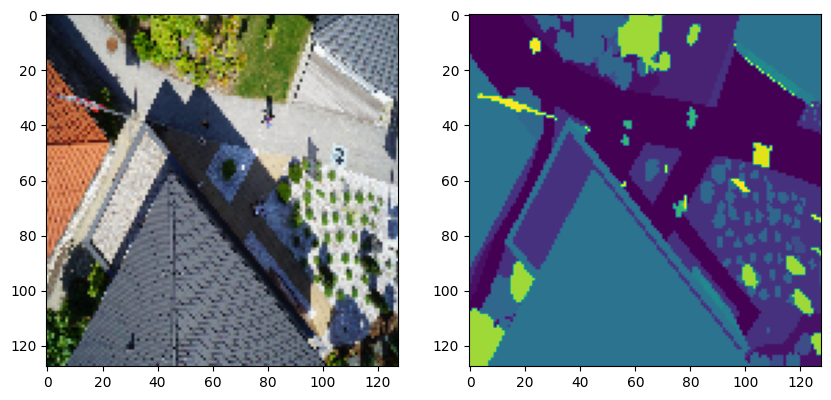

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(X[5])
axs[1].imshow(Y[5])

In [ ]:
# последние 5 изображений с классами
test_images = X[395:]
test_labels = Yc[395:]

x_train, x_val, y_train, y_val = train_test_split(X[0:-5], Yc[0:-5], test_size = 0.15)

In [ ]:
# реализация архитектуры UNet
def unet(num_classes = 23, image_shape = (128, 128, 3)):
    inputs = Input(image_shape)
    
    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(conv1)
    pool1 = MaxPooling2D((2,2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(conv2)
    pool2 = MaxPooling2D((2,2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(conv3)
    pool3 = MaxPooling2D((2,2))(conv3)
    
    conv4 = Conv2D(512, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D((2,2))(drop4)
    
    conv5 = Conv2D(1024, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    up6 = Conv2D(512, 2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(drop5))
    merge6 = concatenate([up6, conv4], axis = 3)
    conv6 = Conv2D(512, 3, activation='relu', kernel_initializer='he_normal', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', kernel_initializer='he_normal', padding='same')(conv6)
    
    up7 = Conv2D(256, 2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv6))
    merge7 = concatenate([up7, conv3], axis = 3)
    conv7 = Conv2D(256, 3, activation='relu', kernel_initializer='he_normal', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', kernel_initializer='he_normal', padding='same')(conv7)
    
    up8 = Conv2D(128, 2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv7))
    merge8 = concatenate([up8, conv2], axis = 3)
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same')(conv8)
    
    up9 = Conv2D(64, 2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv8))
    merge9 = concatenate([up9, conv1], axis = 3)
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(conv9)
    
    conv10 = Conv2D(num_classes, (1, 1), padding='same', activation='softmax')(conv9)
    
    model = Model(inputs, conv10)
    
    return model

In [ ]:
# создание модели на основе архитектуры U-Net
model1 = unet()

# компиляция
model1.compile(optimizer='adam', loss=['categorical_crossentropy'], metrics=['accuracy'])

# обучение
history1 = model1.fit(x=x_train, y=y_train,
              validation_data=(x_val, y_val),
              batch_size=32, epochs=10)

Epoch 1/10
5/5 [==============================] - 387s 78s/step - loss: 47.2276 - accuracy: 0.1651 - val_loss: 2.9160 - val_accuracy: 0.1927
Epoch 2/10
5/5 [==============================] - 367s 75s/step - loss: 2.8216 - accuracy: 0.2655 - val_loss: 2.5464 - val_accuracy: 0.4150
Epoch 3/10
5/5 [==============================] - 369s 76s/step - loss: 2.5464 - accuracy: 0.3751 - val_loss: 2.4684 - val_accuracy: 0.3758
Epoch 4/10
5/5 [==============================] - 373s 77s/step - loss: 2.3711 - accuracy: 0.3920 - val_loss: 2.2781 - val_accuracy: 0.3829
Epoch 5/10
5/5 [==============================] - 349s 71s/step - loss: 2.2225 - accuracy: 0.3929 - val_loss: 2.2531 - val_accuracy: 0.3816
Epoch 6/10
5/5 [==============================] - 354s 71s/step - loss: 2.1781 - accuracy: 0.4251 - val_loss: 2.1623 - val_accuracy: 0.4599
Epoch 7/10
5/5 [==============================] - 351s 72s/step - loss: 2.0892 - accuracy: 0.4799 - val_loss: 2.0805 - val_accuracy: 0.4972
Epoch 8/10
5/5 [===

Text(0, 0.5, 'Accuracy')

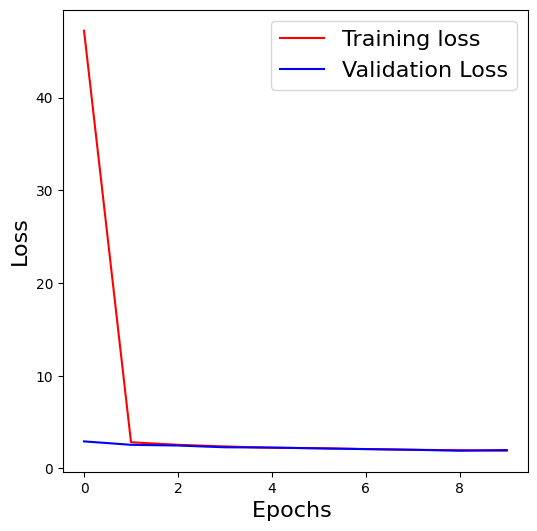

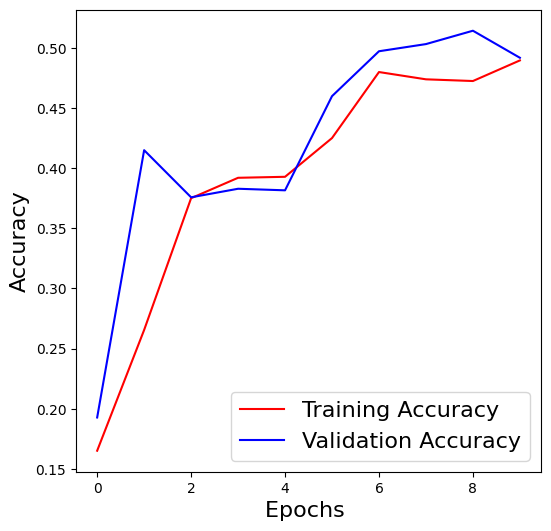

In [ ]:
# вывод информации
plt.figure(figsize=[6,6])
plt.plot(history1.history['loss'],'r')
plt.plot(history1.history['val_loss'],'b')
plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)

plt.figure(figsize=[6,6])
plt.plot(history1.history['accuracy'],'r') 
plt.plot(history1.history['val_accuracy'],'b') 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 

In [ ]:
preds = []
# предсказание для каждого изображения
for image in test_images:
  pred = model1.predict(np.expand_dims(image, 0))
  pred_mask = np.argmax(pred, axis=-1)
  preds.append(pred_mask[0])

1/1 [==============================] - 0s 473ms/step


In [ ]:
# отображения изображения, истинной маски и предсказанной маски
def plot_pred(img, true, predict):
  fig, axs = plt.subplots(1, 3, figsize=(20, 10))
  axs[0].imshow(img)
  axs[0].set_title('Image')
  axs[1].imshow(np.argmax(true, axis=-1))
  axs[1].set_title('Ground Truth')
  axs[2].imshow(predict)
  axs[2].set_title('Prediction')

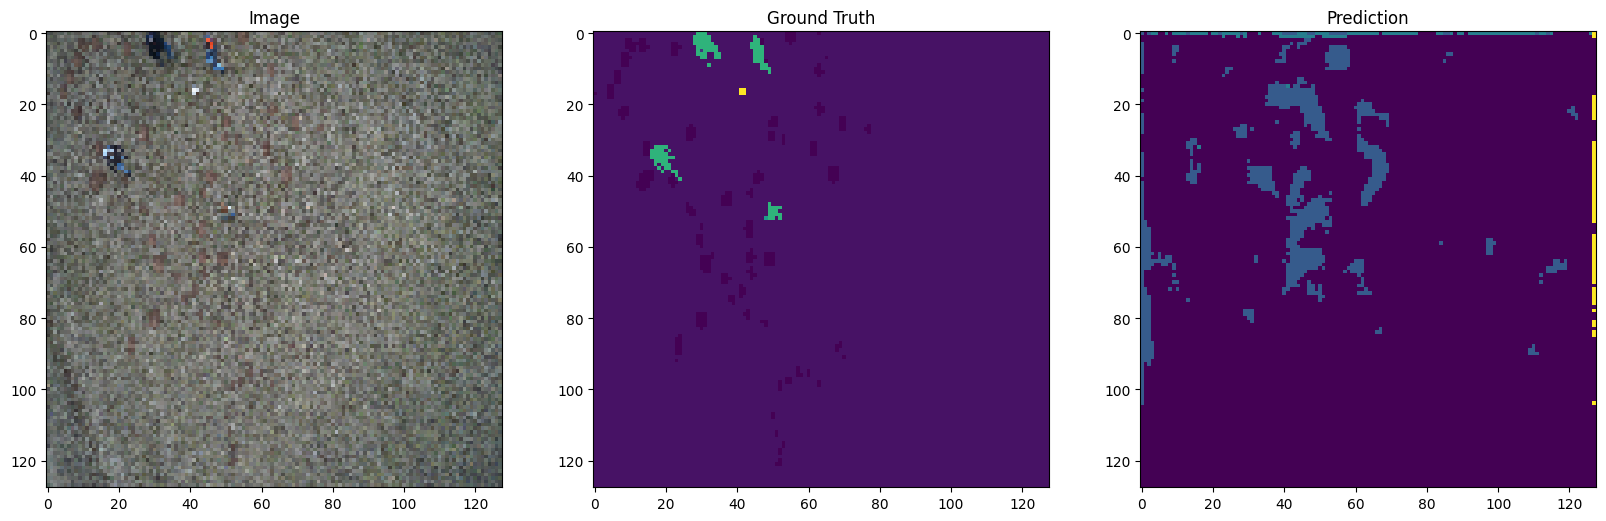

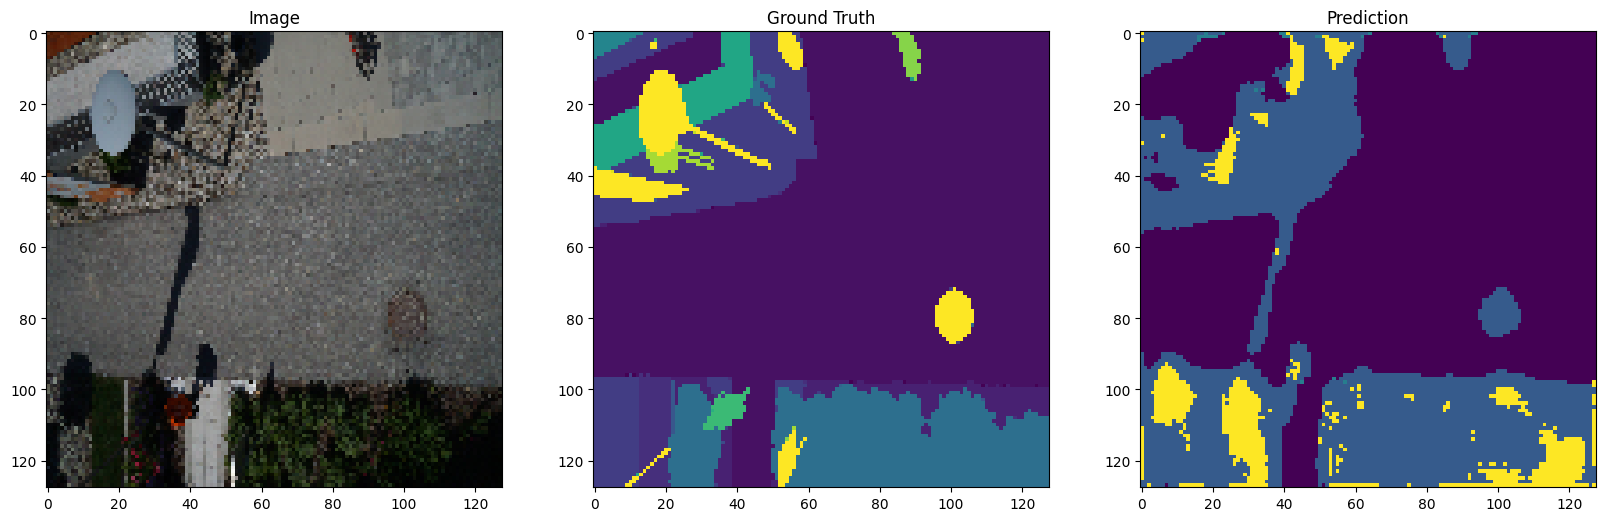

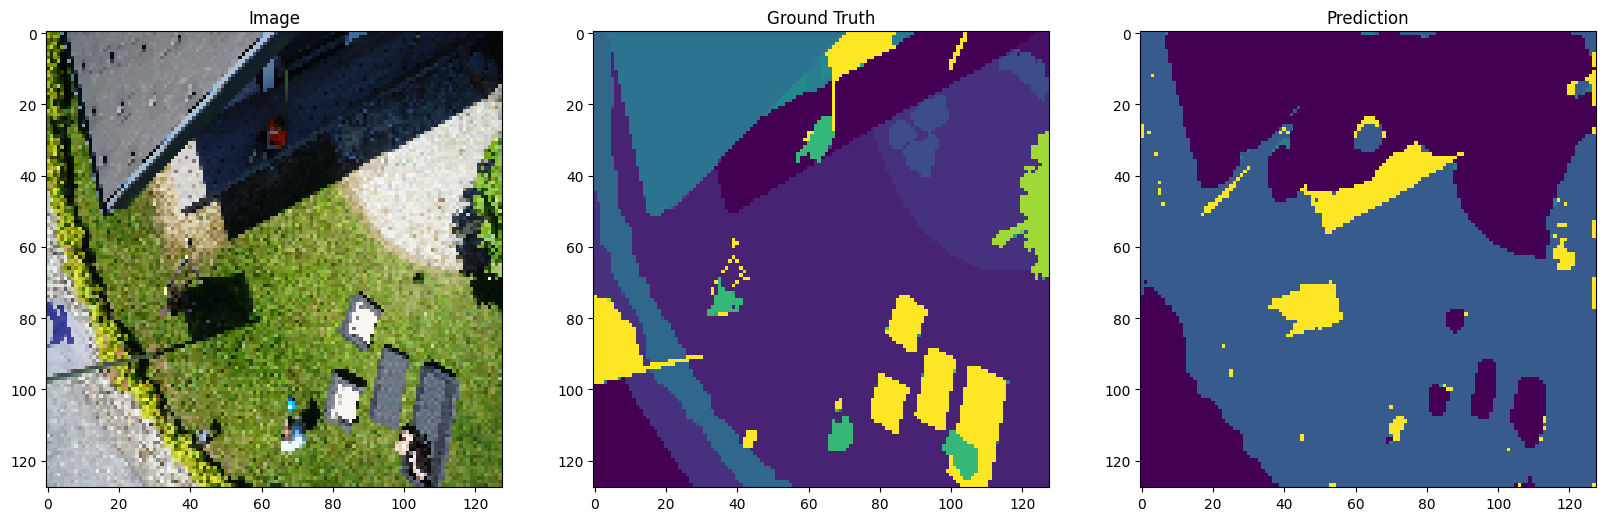

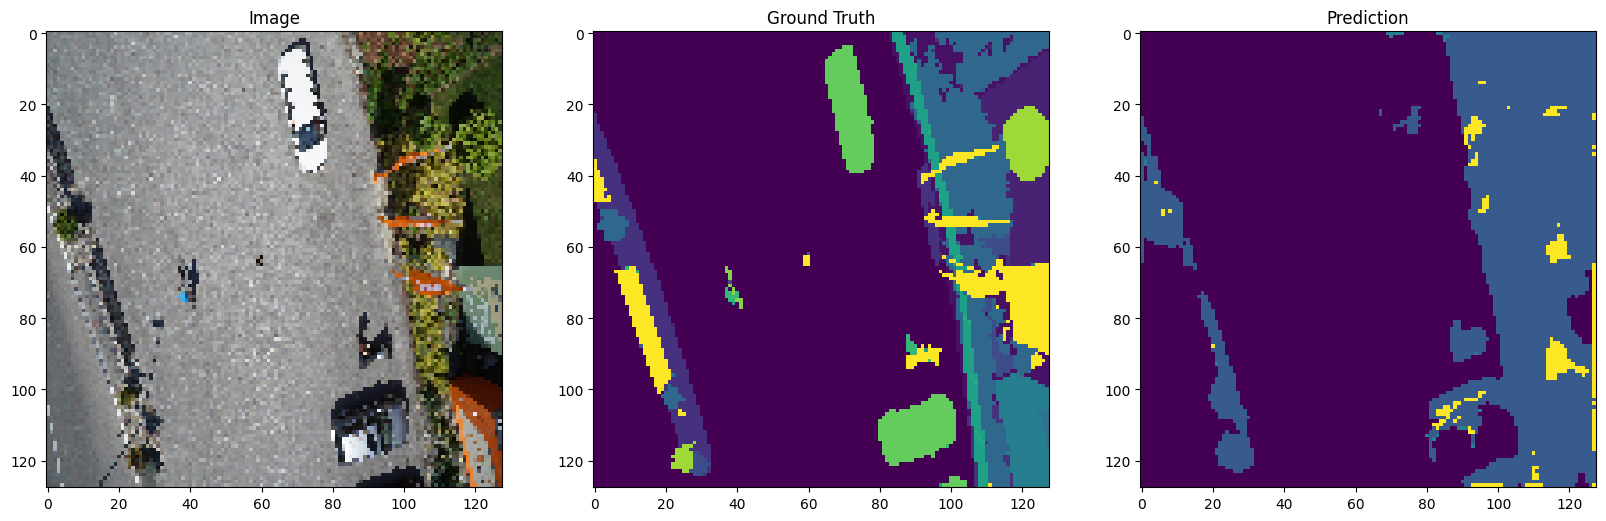

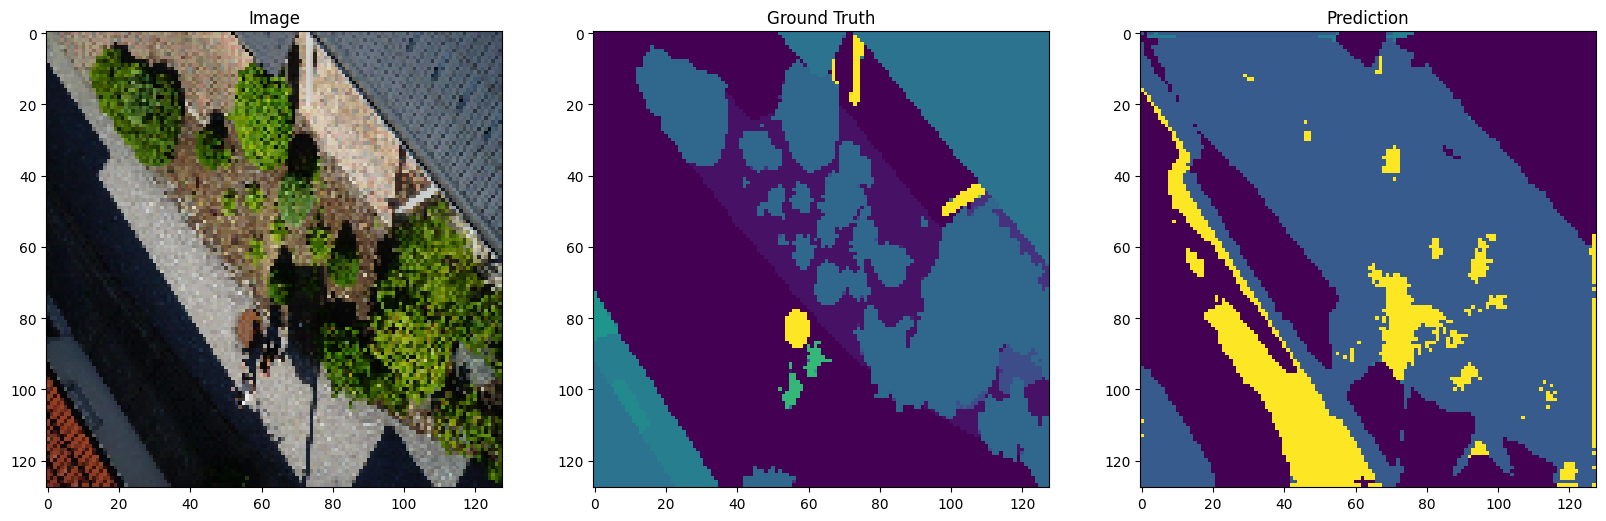

In [ ]:
for i in range(len(test_images)):
  plot_pred(test_images[i], test_labels[i], preds[i])

In [ ]:
# реализация архитектуры UNet2
def unet2(num_classes = 23, image_shape = (128, 128, 3)):
    inputs = Input(image_shape)

    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(conv1)
    pool1 = MaxPooling2D((2,2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(conv2)
    pool2 = MaxPooling2D((2,2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer = 'he_normal', padding='same')(conv3)
    pool3 = MaxPooling2D((2,2))(conv3)
    
    up6 = Conv2D(256, 2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(pool3))
    merge6 = concatenate([up6, conv3], axis = 3)
    conv6 = Conv2D(256, 3, activation='relu', kernel_initializer='he_normal', padding='same')(merge6)
    conv6 = Conv2D(256, 3, activation='relu', kernel_initializer='he_normal', padding='same')(conv6)
    
    up8 = Conv2D(128, 2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv6))
    merge8 = concatenate([up8, conv2], axis = 3)
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same')(conv8)
    
    up9 = Conv2D(64, 2, activation='relu', kernel_initializer='he_normal', padding='same')(UpSampling2D(size=(2,2))(conv8))
    merge9 = concatenate([up9, conv1], axis = 3)
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(conv9)
    
    conv10 = Conv2D(num_classes, (1, 1), padding='same', activation='softmax')(conv9)
    
    model = Model(inputs, conv10)
    
    return model

In [ ]:
# создание модели на основе архитектуры U-Net2
model2 = unet2()

# компиляция
model2.compile(optimizer='adam', loss=['categorical_crossentropy'], metrics=['accuracy'])

# обучение
history2 = model2.fit(x=x_train, y=y_train,
              validation_data=(x_val, y_val),
              batch_size=64, epochs=5)

Epoch 1/5
3/3 [==============================] - 249s 76s/step - loss: 4.5289 - accuracy: 0.2294 - val_loss: 2.5409 - val_accuracy: 0.3760
Epoch 2/5
3/3 [==============================] - 240s 76s/step - loss: 2.4944 - accuracy: 0.3888 - val_loss: 2.3221 - val_accuracy: 0.3815
Epoch 3/5
3/3 [==============================] - 231s 73s/step - loss: 2.2846 - accuracy: 0.4011 - val_loss: 2.1628 - val_accuracy: 0.4119
Epoch 4/5
3/3 [==============================] - 237s 76s/step - loss: 2.1554 - accuracy: 0.4421 - val_loss: 2.1241 - val_accuracy: 0.4008
Epoch 5/5
3/3 [==============================] - 237s 74s/step - loss: 2.0972 - accuracy: 0.4303 - val_loss: 2.0482 - val_accuracy: 0.4586


Text(0, 0.5, 'Accuracy')

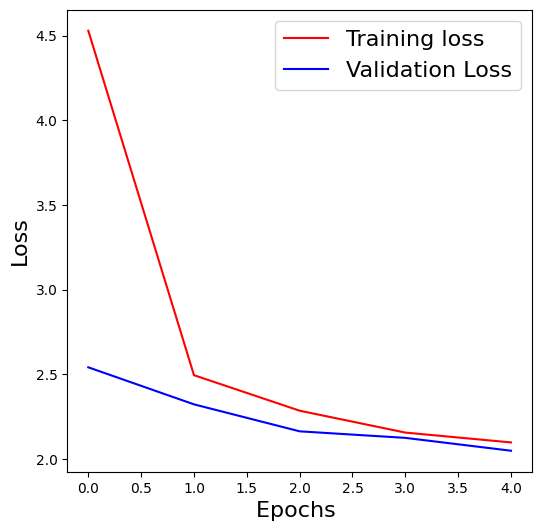

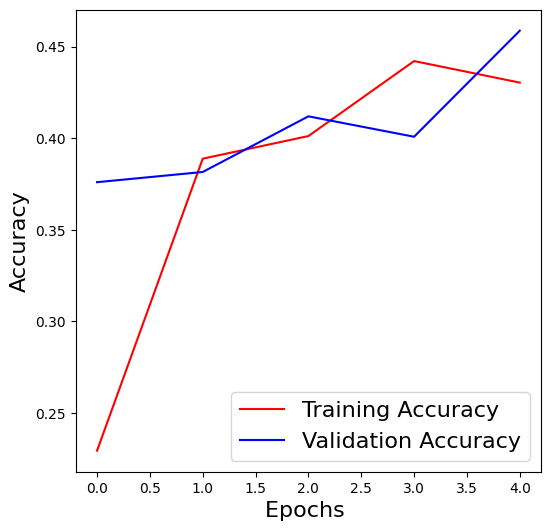

In [ ]:
# визуализая модели
plt.figure(figsize=[6,6])
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'],'b')
plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)

plt.figure(figsize=[6,6])
plt.plot(history2.history['accuracy'],'r') 
plt.plot(history2.history['val_accuracy'],'b') 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 

In [ ]:
# предсказание маски сегментации
preds2 = []
for image in test_images: # для каждого изображения
  pred = model2.predict(np.expand_dims(image, 0)) # добавления размерности
  pred_mask = np.argmax(pred, axis=-1) # предсказание класса с максимальной вероятностью
  preds2.append(pred_mask[0])

1/1 [==============================] - 0s 320ms/step


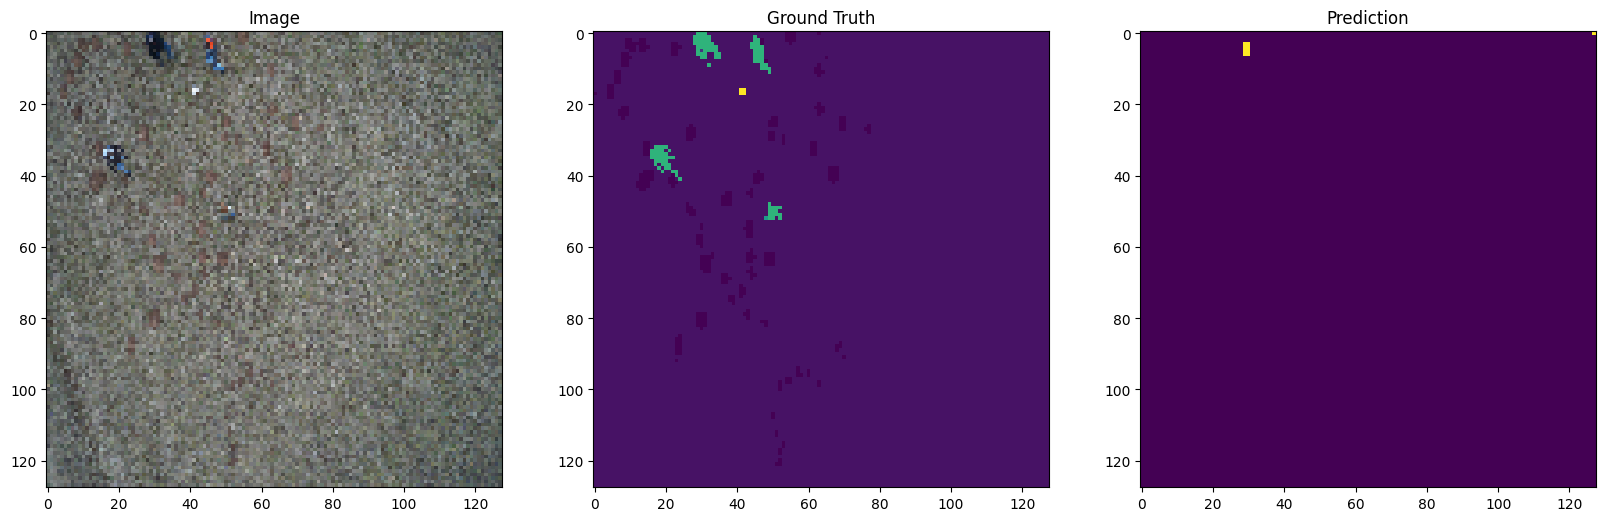

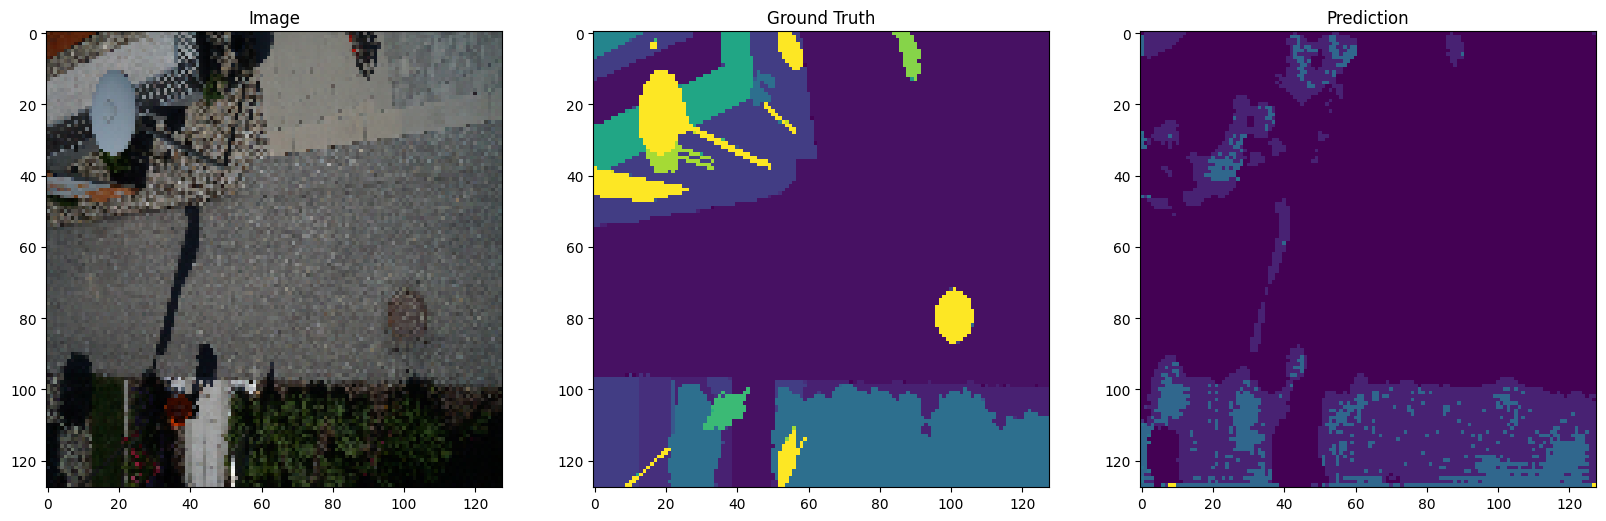

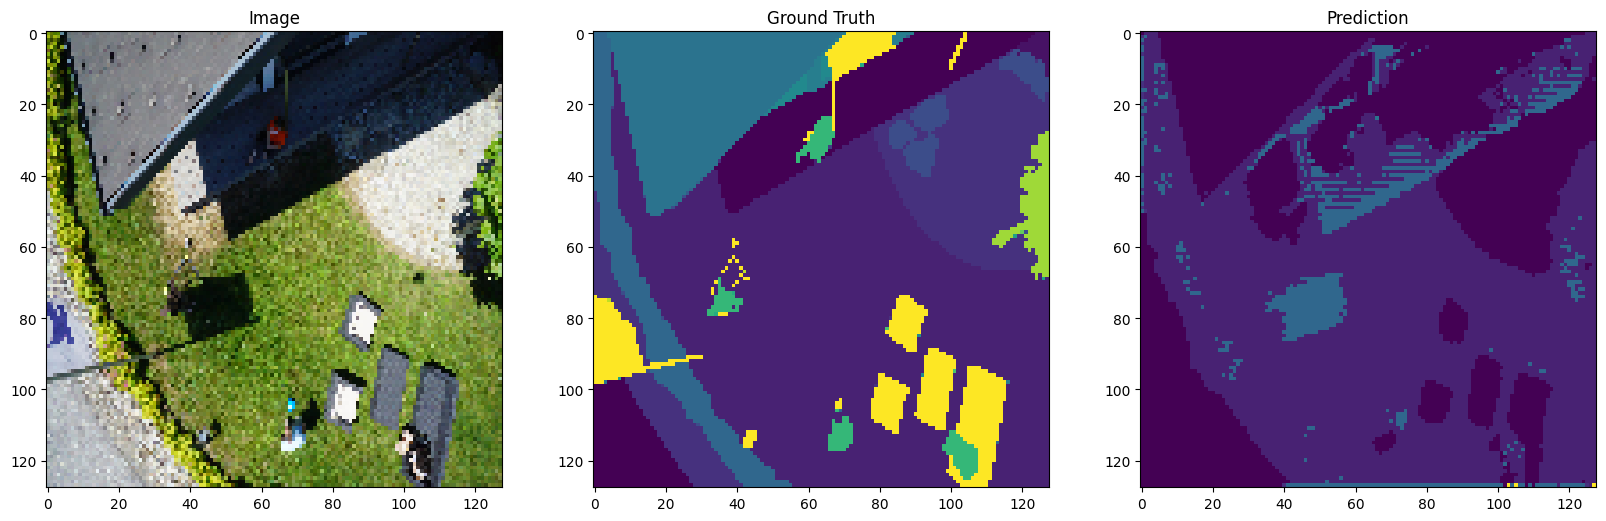

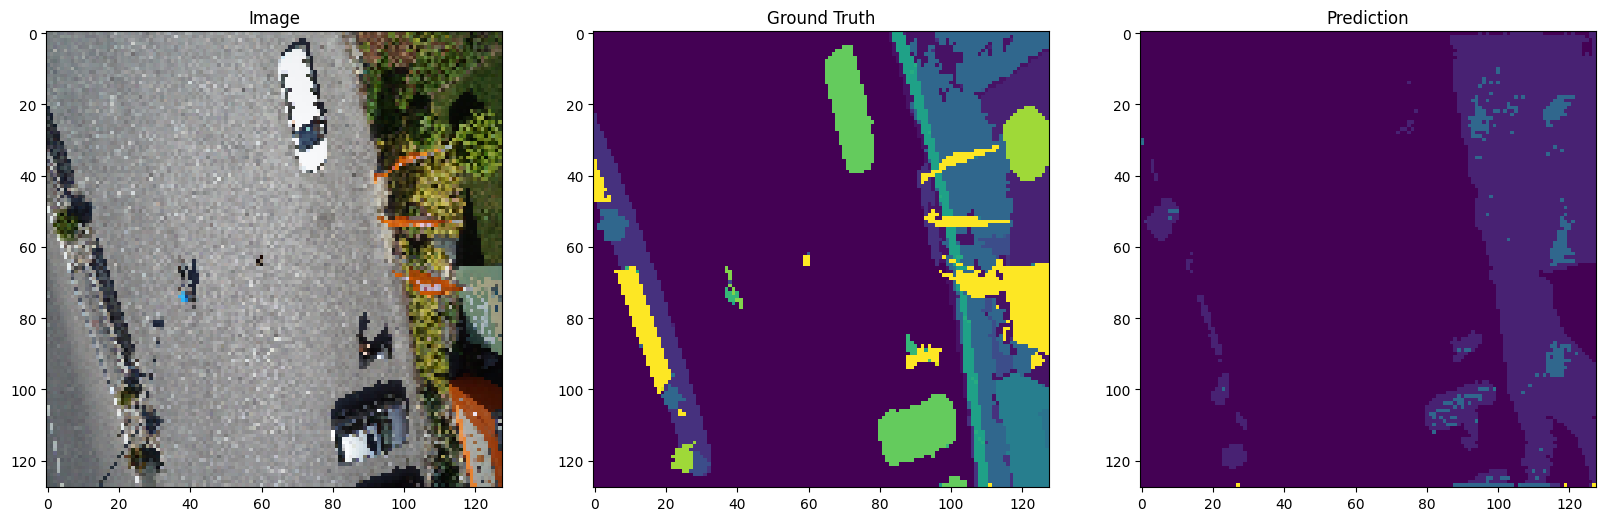

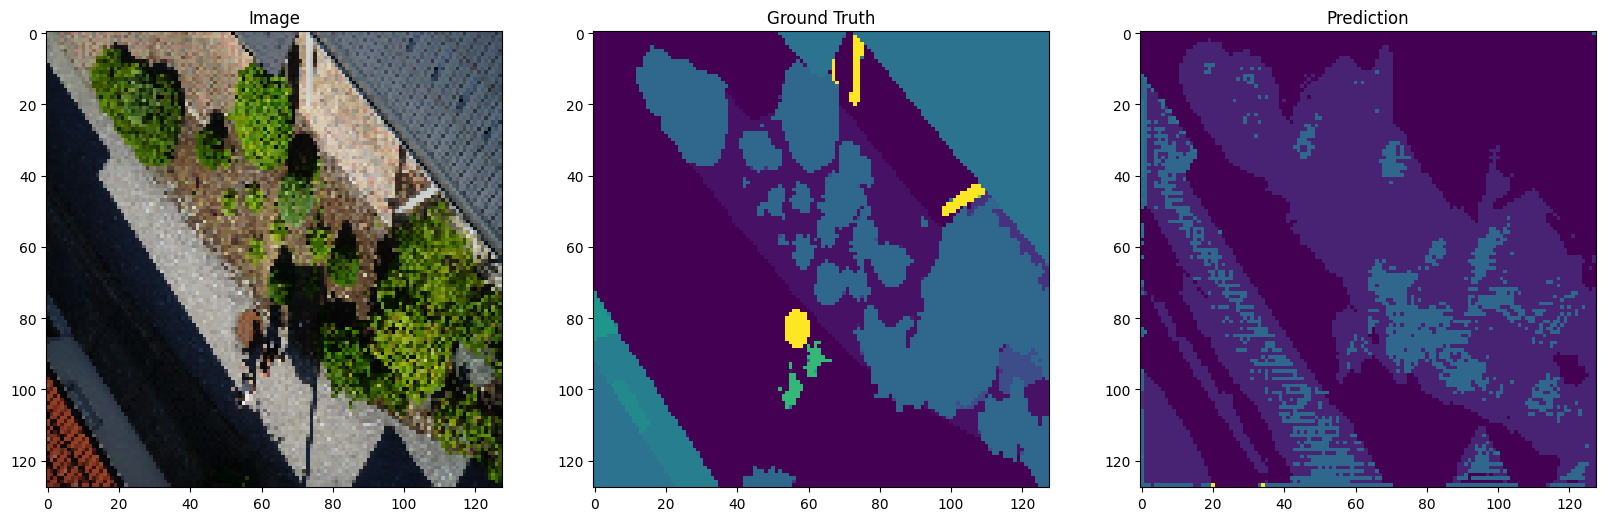

In [ ]:
for i in range(len(test_images)):
  # визуализации: тестовое изображение, маска сегментации, предсказанная маска сегментации
  plot_pred(test_images[i], test_labels[i], preds2[i])

In [ ]:
import tensorflow as tf

In [ ]:
# создание модели на основе архитектуры U-Net
model3 = unet()

# компиляция
model3.compile(optimizer='adam', loss=['mse'], metrics=[tf.keras.metrics.MeanIoU(num_classes=23)])

# обучение
history3 = model3.fit(x=x_train, y=y_train,
              validation_data=(x_val, y_val),
              batch_size=8, epochs=5)

Epoch 1/5
42/42 [==============================] - 954s 22s/step - loss: 0.0352 - mean_io_u: 0.4783 - val_loss: 0.0314 - val_mean_io_u: 0.4783
Epoch 2/5
42/42 [==============================] - 943s 22s/step - loss: 0.0306 - mean_io_u: 0.4783 - val_loss: 0.0281 - val_mean_io_u: 0.4783
Epoch 3/5
42/42 [==============================] - 896s 21s/step - loss: 0.0287 - mean_io_u: 0.4783 - val_loss: 0.0276 - val_mean_io_u: 0.4783
Epoch 4/5
42/42 [==============================] - 902s 21s/step - loss: 0.0275 - mean_io_u: 0.4783 - val_loss: 0.0269 - val_mean_io_u: 0.4783
Epoch 5/5
42/42 [==============================] - 894s 21s/step - loss: 0.0275 - mean_io_u: 0.4783 - val_loss: 0.0260 - val_mean_io_u: 0.4783


In [ ]:
# предсказание маски сегментации
preds3 = []
for image in test_images: # для каждого изображения
  pred = model3.predict(np.expand_dims(image, 0), verbose=0) # добавления размерности
  pred_mask = np.argmax(pred, axis=-1) # предсказание класса с максимальной вероятностью
  preds3.append(pred_mask[0])

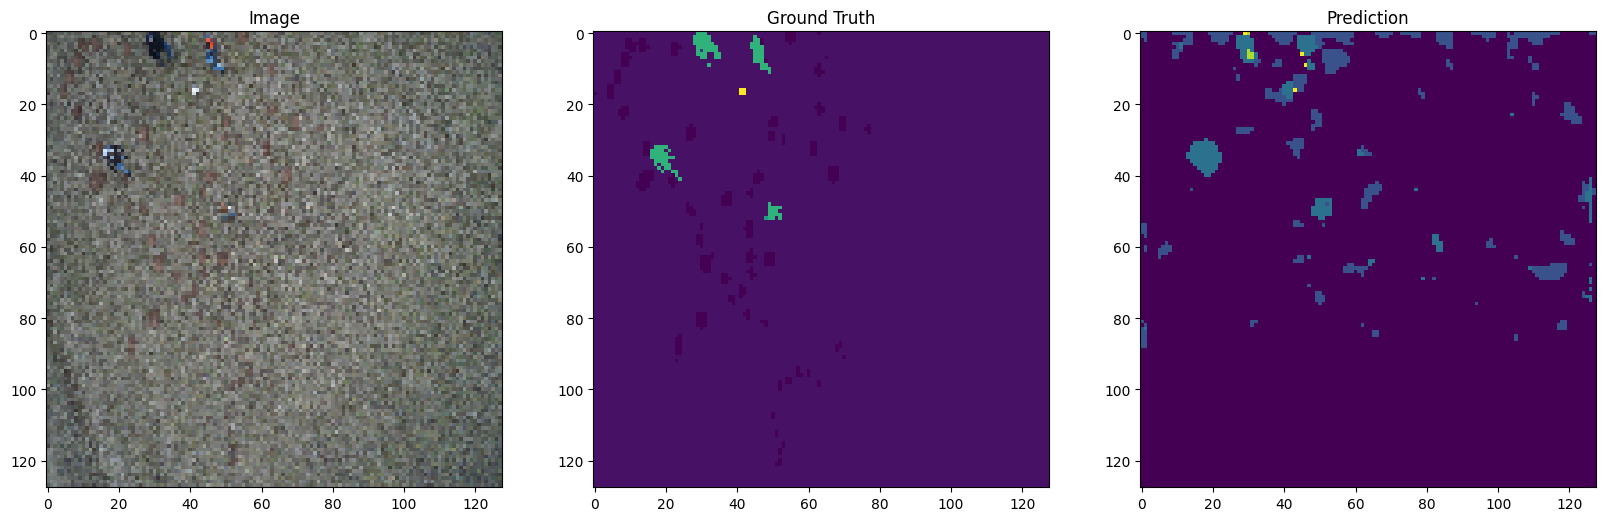

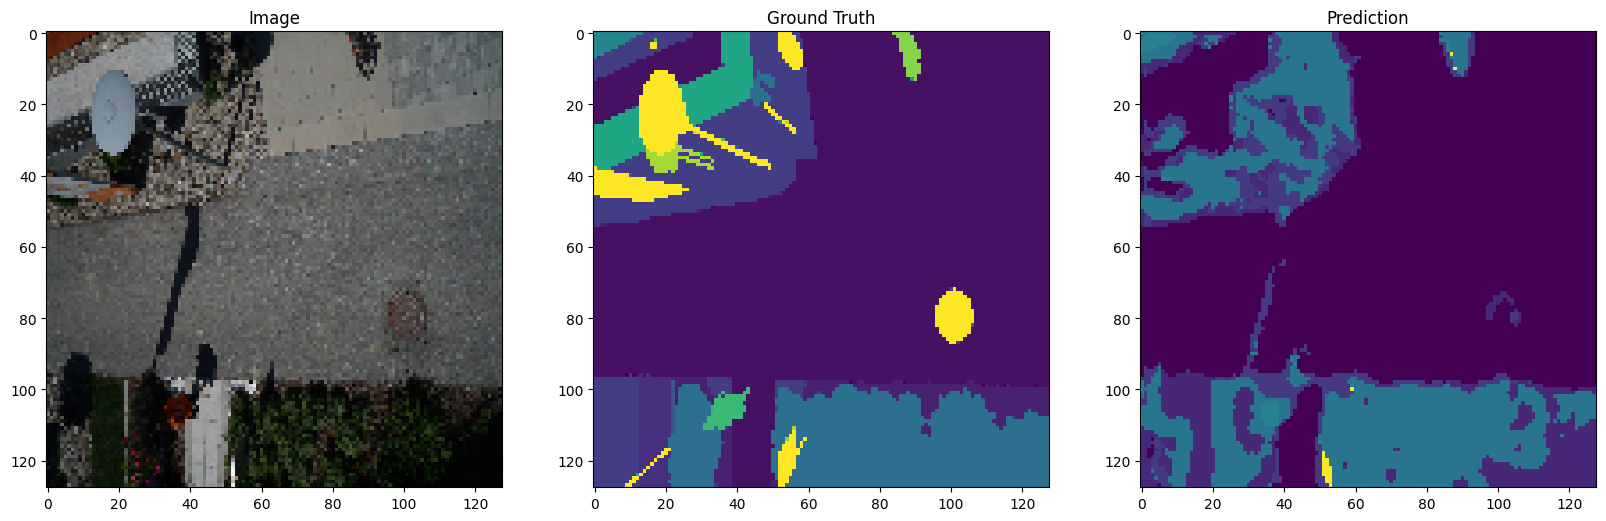

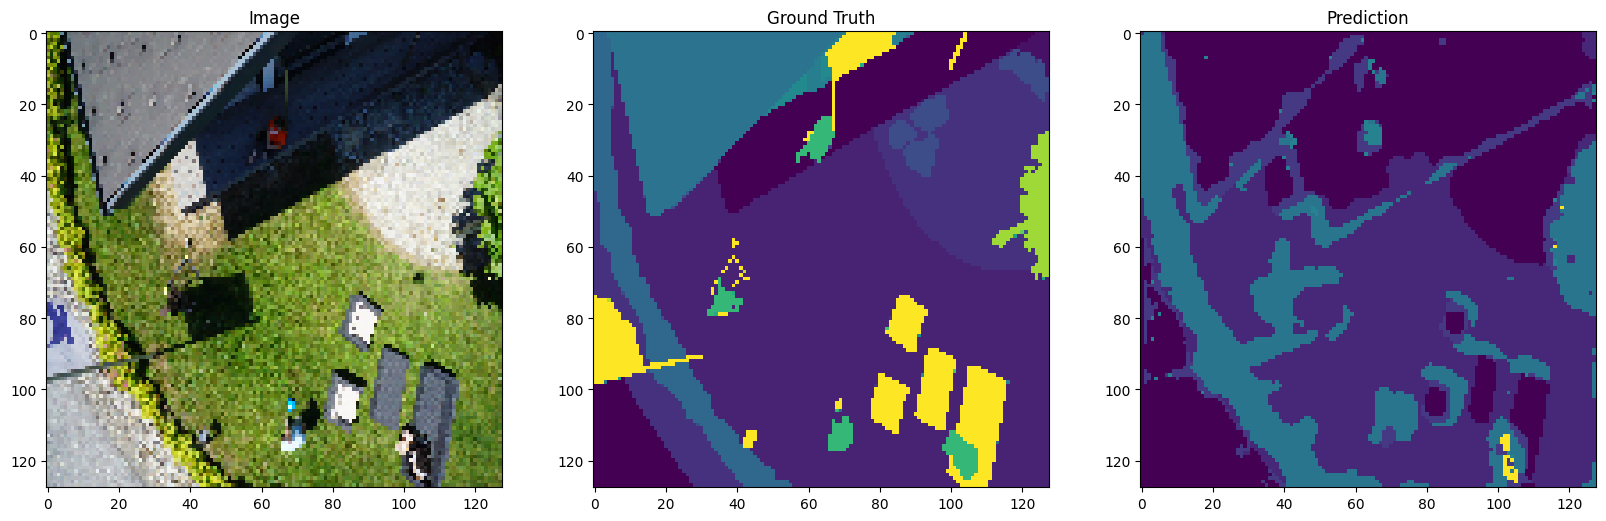

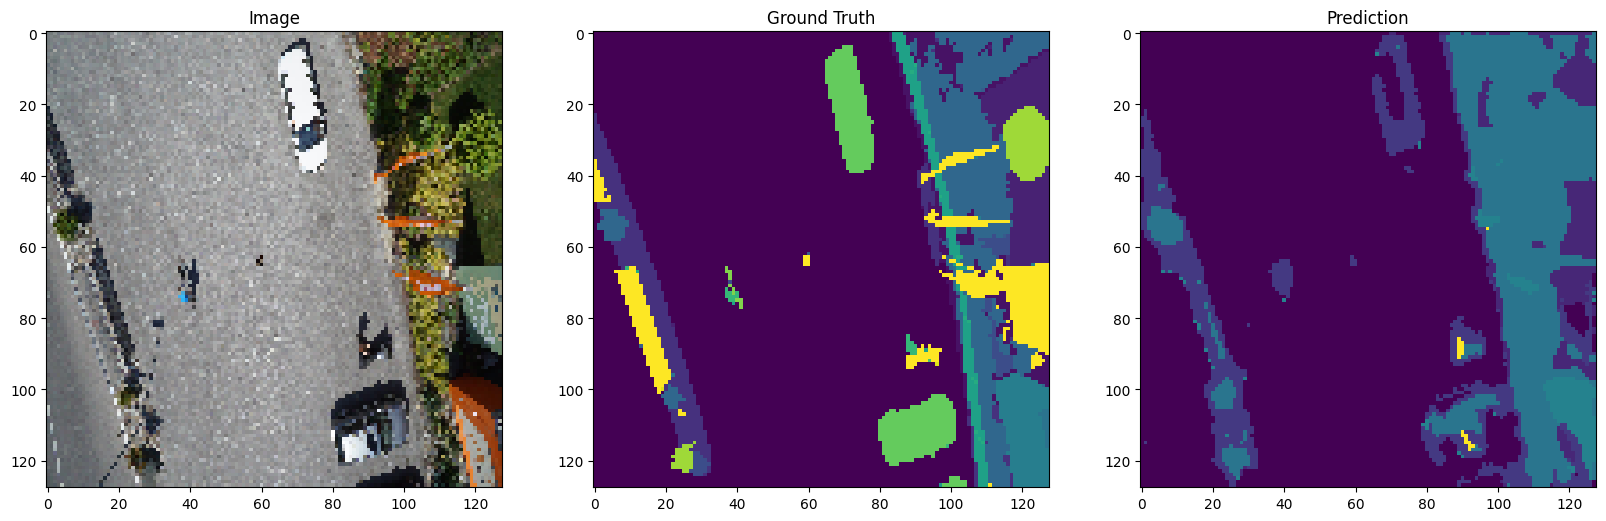

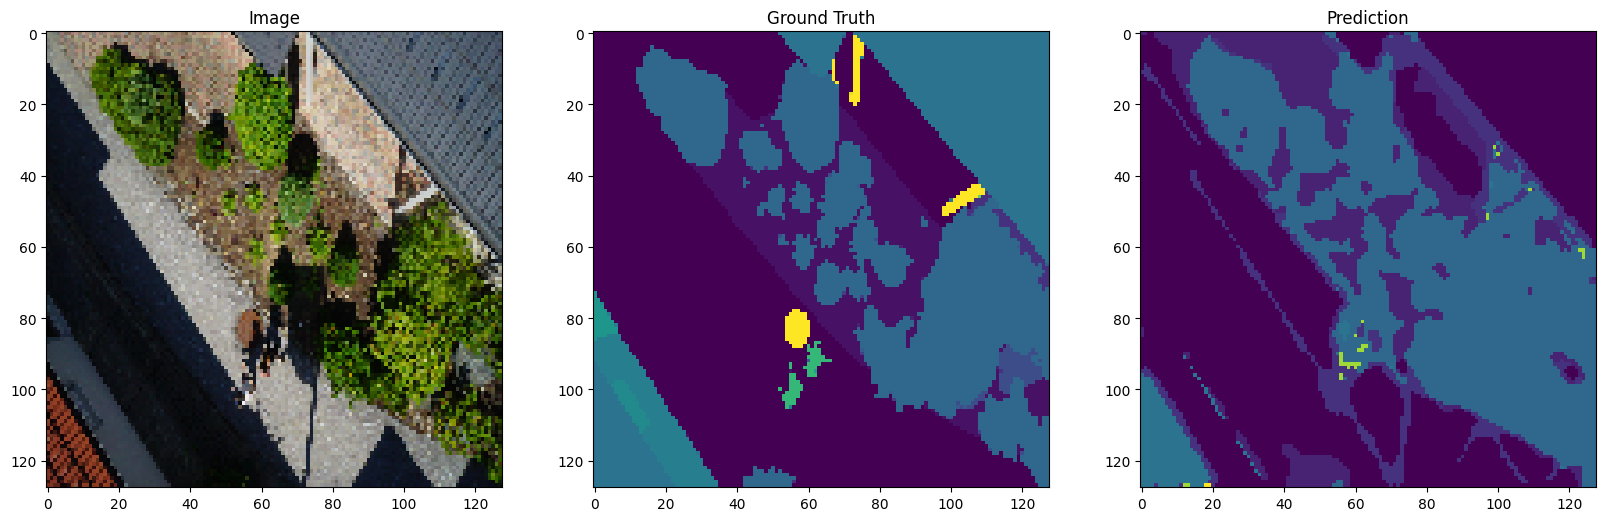

In [ ]:
for i in range(len(test_images)):
  # визуализации: тестовое изображение, маска сегментации, предсказанная маска сегментации
  plot_pred(test_images[i], test_labels[i], preds3[i])